In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')

import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())




/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'2018-02-21 14:48:15.194341'

In [262]:
def savefig(filename):
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/latex version/img/{}.pdf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pgf'.format(filename))
    plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Vansjo/tables and figures/img/{}.pdf'.format(filename))

In [3]:
RCP8_IPSL_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP8_IPSL_2015_2070.mat', 'r')
RCP4_IPSL_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP4_IPSL_2015_2070.mat', 'r')
RCP8_GFDL_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP8_GFDL_2015_2070.mat', 'r')
RCP4_GFDL_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP4_GFDL_2015_2070.mat', 'r')
RCP8_NorESM_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP85_NorESM_2015_2070.mat', 'r')
RCP4_NorESM_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_RCP45_NorESM_2015_2070.mat', 'r')
hist_20y_plotter = h5py.File('/Volumes/Backups/Scenarios/96ts_T_only_full_scen_base_historical_20y_2015_2070.mat', 'r')

In [4]:
days = np.array(hist_20y_plotter['MyLake_results']['basin1']['concentrations']['C'])[:,8]

In [5]:
names_scen = ['RCP8 IPSL 2015-2070', 'RCP4 IPSL 2015-2070', 'RCP8 GFDL 2015-2070', 'RCP4 GFDL 2015-2070', 'RCP8 NorESM 2015-2070', 'RCP4 NorESM 2015-2070', 'Historical 1995-2015']

In [6]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Phy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

In [7]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear
# PO4_4m = PO4_4m[-365*55:]

In [8]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Oxy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['O2'])[:,81]
    
Oxy['Year'] = Oxy.Date.dt.year
Oxy['Month'] = Oxy.Date.dt.month
Oxy['Day'] = Oxy.Date.dt.day
Oxy['DOY'] = Oxy.Date.dt.dayofyear
Oxy['WOY'] = Oxy.Date.dt.weekofyear
# Oxy = Oxy[-365*55:]

In [9]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['T']), axis=1)
    
Tw_mean['Year'] = Tw_mean.Date.dt.year
Tw_mean['Month'] = Tw_mean.Date.dt.month
Tw_mean['Day'] = Tw_mean.Date.dt.day
Tw_mean['DOY'] = Tw_mean.Date.dt.dayofyear
Tw_mean['WOY'] = Tw_mean.Date.dt.weekofyear
# Tw_mean = Tw_mean[-365*55:]

In [10]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tw_4m = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tw_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['T'][:,0:9]), axis=1)
    
Tw_4m['Year'] = Tw_4m.Date.dt.year
Tw_4m['Month'] = Tw_4m.Date.dt.month
Tw_4m['Day'] = Tw_4m.Date.dt.day
Tw_4m['DOY'] = Tw_4m.Date.dt.dayofyear
Tw_4m['WOY'] = Tw_4m.Date.dt.weekofyear
# Tw_4m = Tw_4m[-365*55:]

In [11]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Kz_mean = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Kz_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)
    
Kz_mean['Year'] = Kz_mean.Date.dt.year
Kz_mean['Month'] = Kz_mean.Date.dt.month
Kz_mean['Day'] = Kz_mean.Date.dt.day
Kz_mean['DOY'] = Kz_mean.Date.dt.dayofyear
Kz_mean['WOY'] = Kz_mean.Date.dt.weekofyear
# Kz_mean = Kz_mean[-365*55:]

In [12]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tsed[n] = np.array(res['MyLake_results']['basin1']['T'])[:, 76]
    
Tsed['Year'] = Tsed.Date.dt.year
Tsed['Month'] = Tsed.Date.dt.month
Tsed['Day'] = Tsed.Date.dt.day
Tsed['DOY'] = Tsed.Date.dt.dayofyear
Tsed['WOY'] = Tsed.Date.dt.weekofyear
# Tsed = Tsed[-365*55:]

In [13]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 0]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear
Ice['WOY'] = Ice.Date.dt.weekofyear
# Ice = Ice[-365*55:]

In [14]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Tair[n] =np.array(res['MyLake_results']['basin1']['Wt'])[2, :]
    
Tair['Year'] = Tair.Date.dt.year
Tair['Month'] = Tair.Date.dt.month
Tair['Day'] = Tair.Date.dt.day
Tair['DOY'] = Tair.Date.dt.dayofyear
Tair['WOY'] = Tair.Date.dt.weekofyear
# Tair = Tair[-365*55:]

In [15]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
pycno_depth = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    pycno_depth[n] = np.array(res['MyLake_results']['basin1']['MixStat'])[:, 11]
    
pycno_depth['Year'] = pycno_depth.Date.dt.year
pycno_depth['Month'] = pycno_depth.Date.dt.month
pycno_depth['Day'] = pycno_depth.Date.dt.day
pycno_depth['DOY'] = pycno_depth.Date.dt.dayofyear
pycno_depth['WOY'] = pycno_depth.Date.dt.weekofyear
# pycno_depth = pycno_depth[-365*55:]

In [16]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Ice_bool[n] = np.array(res['MyLake_results']['basin1']['His'])[:, 6]
    
Ice_bool['Year'] = Ice_bool.Date.dt.year
Ice_bool['Month'] = Ice_bool.Date.dt.month
Ice_bool['Day'] = Ice_bool.Date.dt.day
Ice_bool['DOY'] = Ice_bool.Date.dt.dayofyear
Ice_bool['WOY'] = Ice_bool.Date.dt.weekofyear
# Ice_bool = Ice_bool[-365*55:]

In [17]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])

    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear
# P_fx = P_fx[-365*55:]

In [18]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Chl_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Chl_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'])
    
Chl_fx['Year'] = Chl_fx.Date.dt.year
Chl_fx['Month'] = Chl_fx.Date.dt.month
Chl_fx['Day'] = Chl_fx.Date.dt.day
Chl_fx['DOY'] = Chl_fx.Date.dt.dayofyear
Chl_fx['WOY'] = Chl_fx.Date.dt.weekofyear
# Chl_fx = Chl_fx[-365*55:]

In [19]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    Fe2_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['Fe2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['Fe2'])
    
Fe2_fx['Year'] = Fe2_fx.Date.dt.year
Fe2_fx['Month'] = Fe2_fx.Date.dt.month
Fe2_fx['Day'] = Fe2_fx.Date.dt.day
Fe2_fx['DOY'] = Fe2_fx.Date.dt.dayofyear
Fe2_fx['WOY'] = Fe2_fx.Date.dt.weekofyear
# Fe2_fx = Fe2_fx[-365*55:]

In [20]:
date = datetime(2015, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, RCP8_NorESM_plotter, RCP4_NorESM_plotter, hist_20y_plotter],names_scen):
    O2_fx[n] = -(np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['O2']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['O2']))
    
O2_fx['Year'] = O2_fx.Date.dt.year
O2_fx['Month'] = O2_fx.Date.dt.month
O2_fx['Day'] = O2_fx.Date.dt.day
O2_fx['DOY'] = O2_fx.Date.dt.dayofyear
O2_fx['WOY'] = O2_fx.Date.dt.weekofyear
# O2_fx = O2_fx[-365*55:]

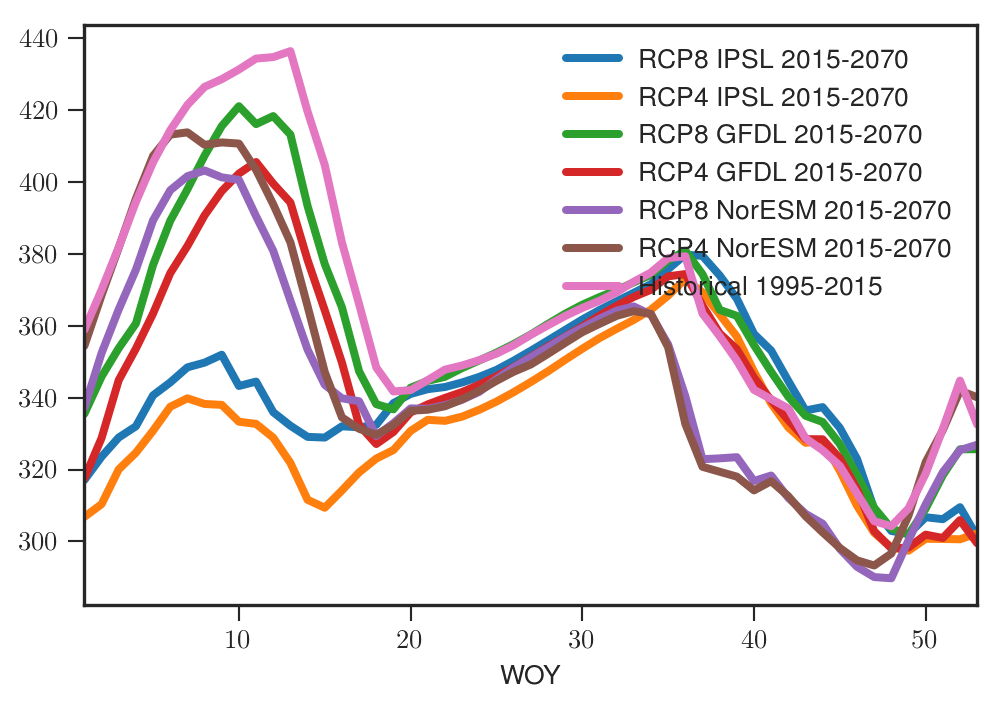

In [21]:
Fe2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3)

Text(0.5,1,'2040-2050 Mean Oxy')

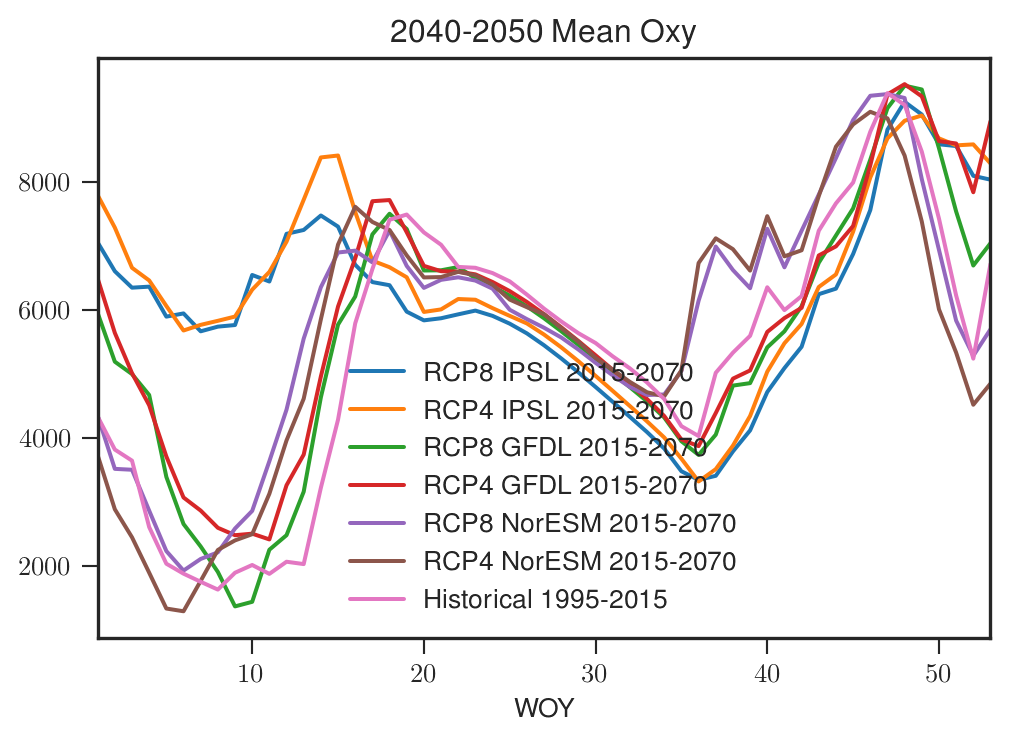

In [198]:
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot()
# plt.xlim(120,200)
plt.title('2040-2050 Mean Oxy')

(1, 53)

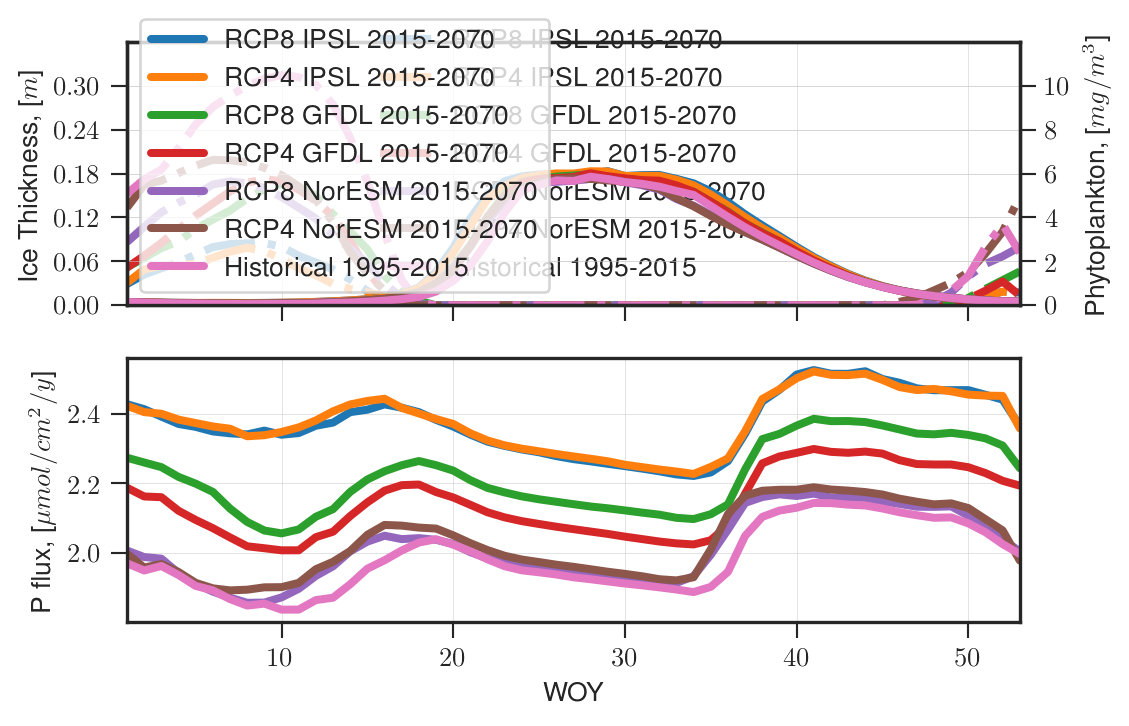

In [199]:
ax0 = plt.subplot(211)
ax1 = ax0.twinx()

ax1.set_ylim(0,12)
ax0.set_ylim(0,0.36)


Phy[-365*45:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Ice[-365*45:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-.', ax=ax0, lw=3)

ax1.set_yticks(np.arange(0, 12, 1.0*2))
ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Week of the year')
ax1.legend(frameon=1)

ax2 = plt.subplot(212)
P_fx[-365*45:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2)
ax2.legend_.remove()
ax2.set_ylabel('P flux, [$\mu mol/cm^2/y$]')
# ax2.set_ylim(0.6, 0.9)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [200]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

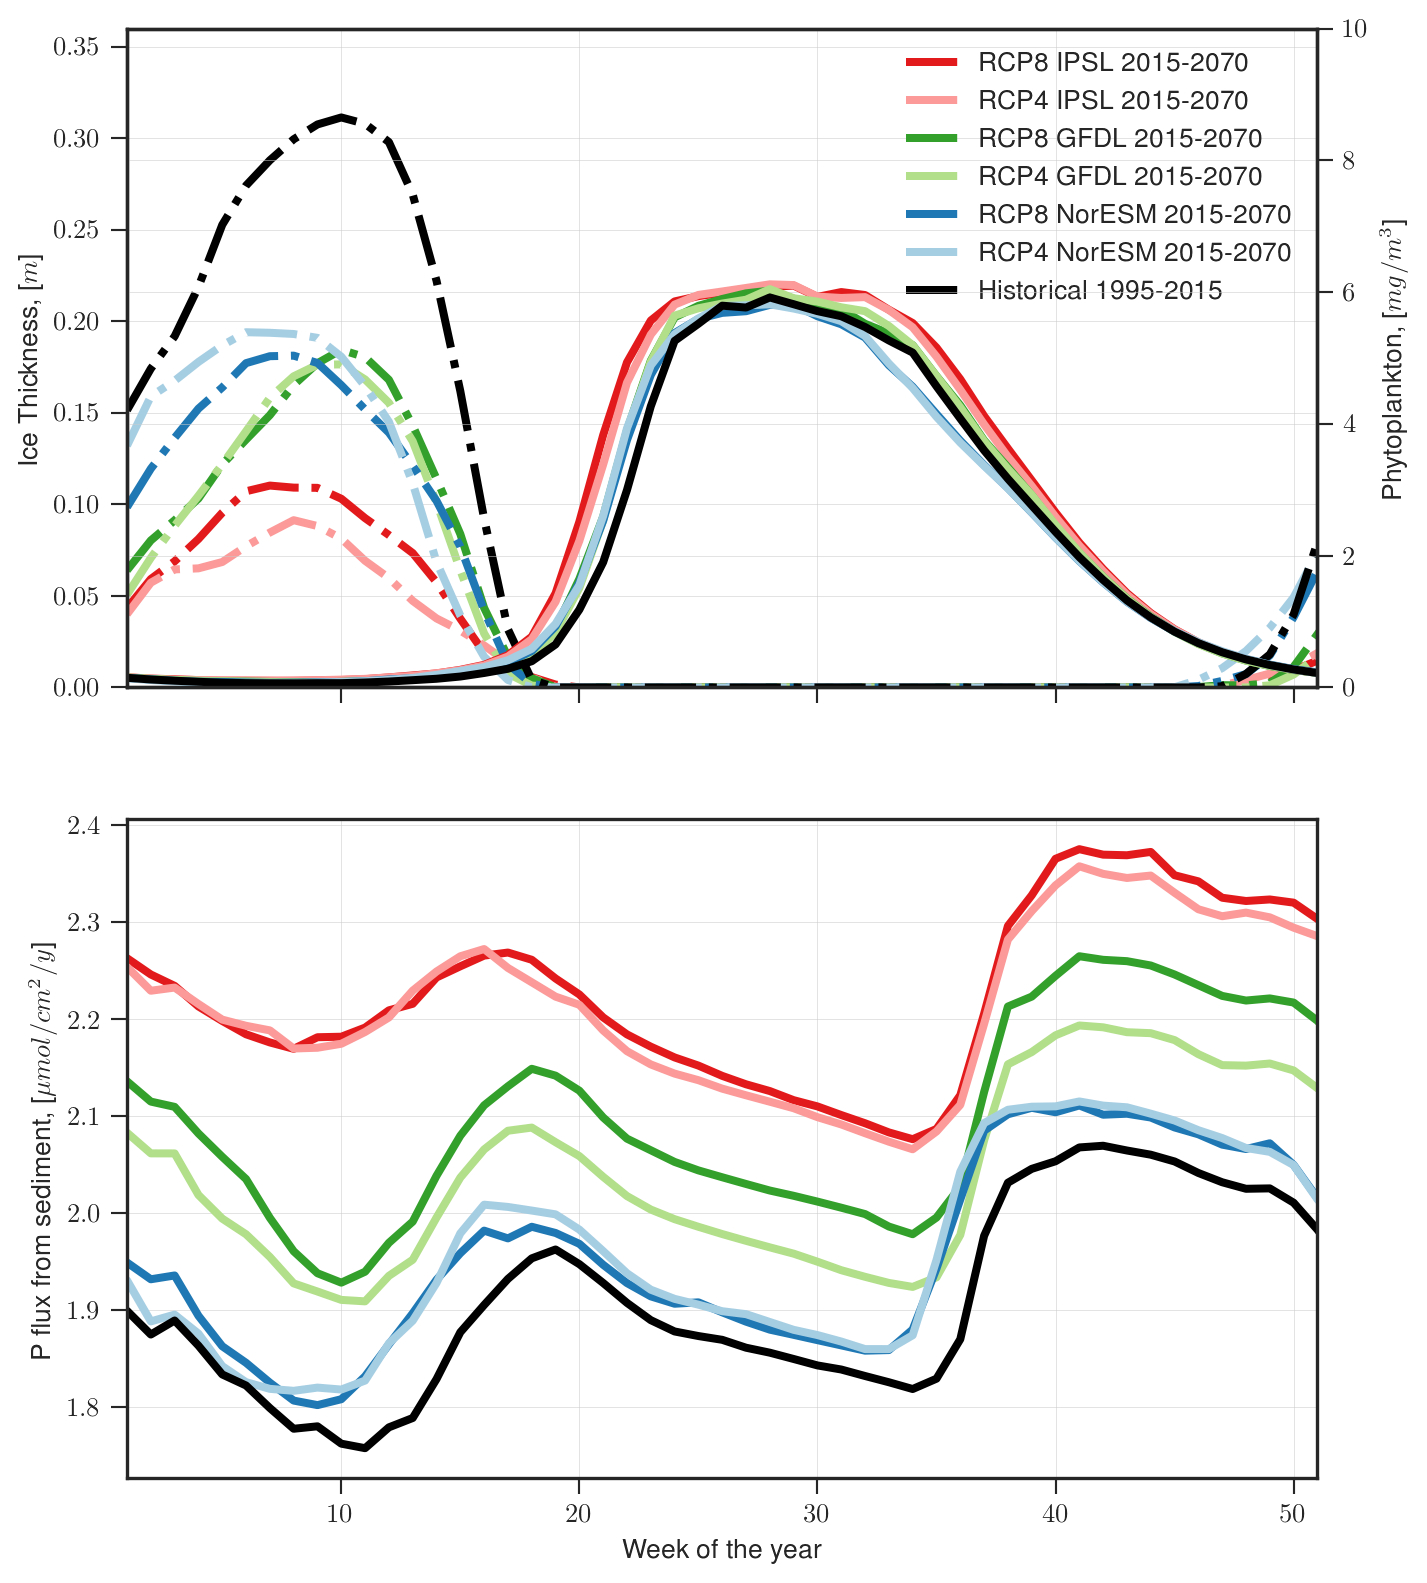

In [201]:
plt.figure(figsize=(8,10))
ax0 = plt.subplot(211)
ax1 = ax0.twinx()




Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3, color=clr_pltt)
Ice[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-.', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax1.legend_.remove()
ax1.set_ylim(0,10)
ax0.set_ylim(0,0.36)
ax1.set_xlim(1,51)
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
P_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('P flux from sediment, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

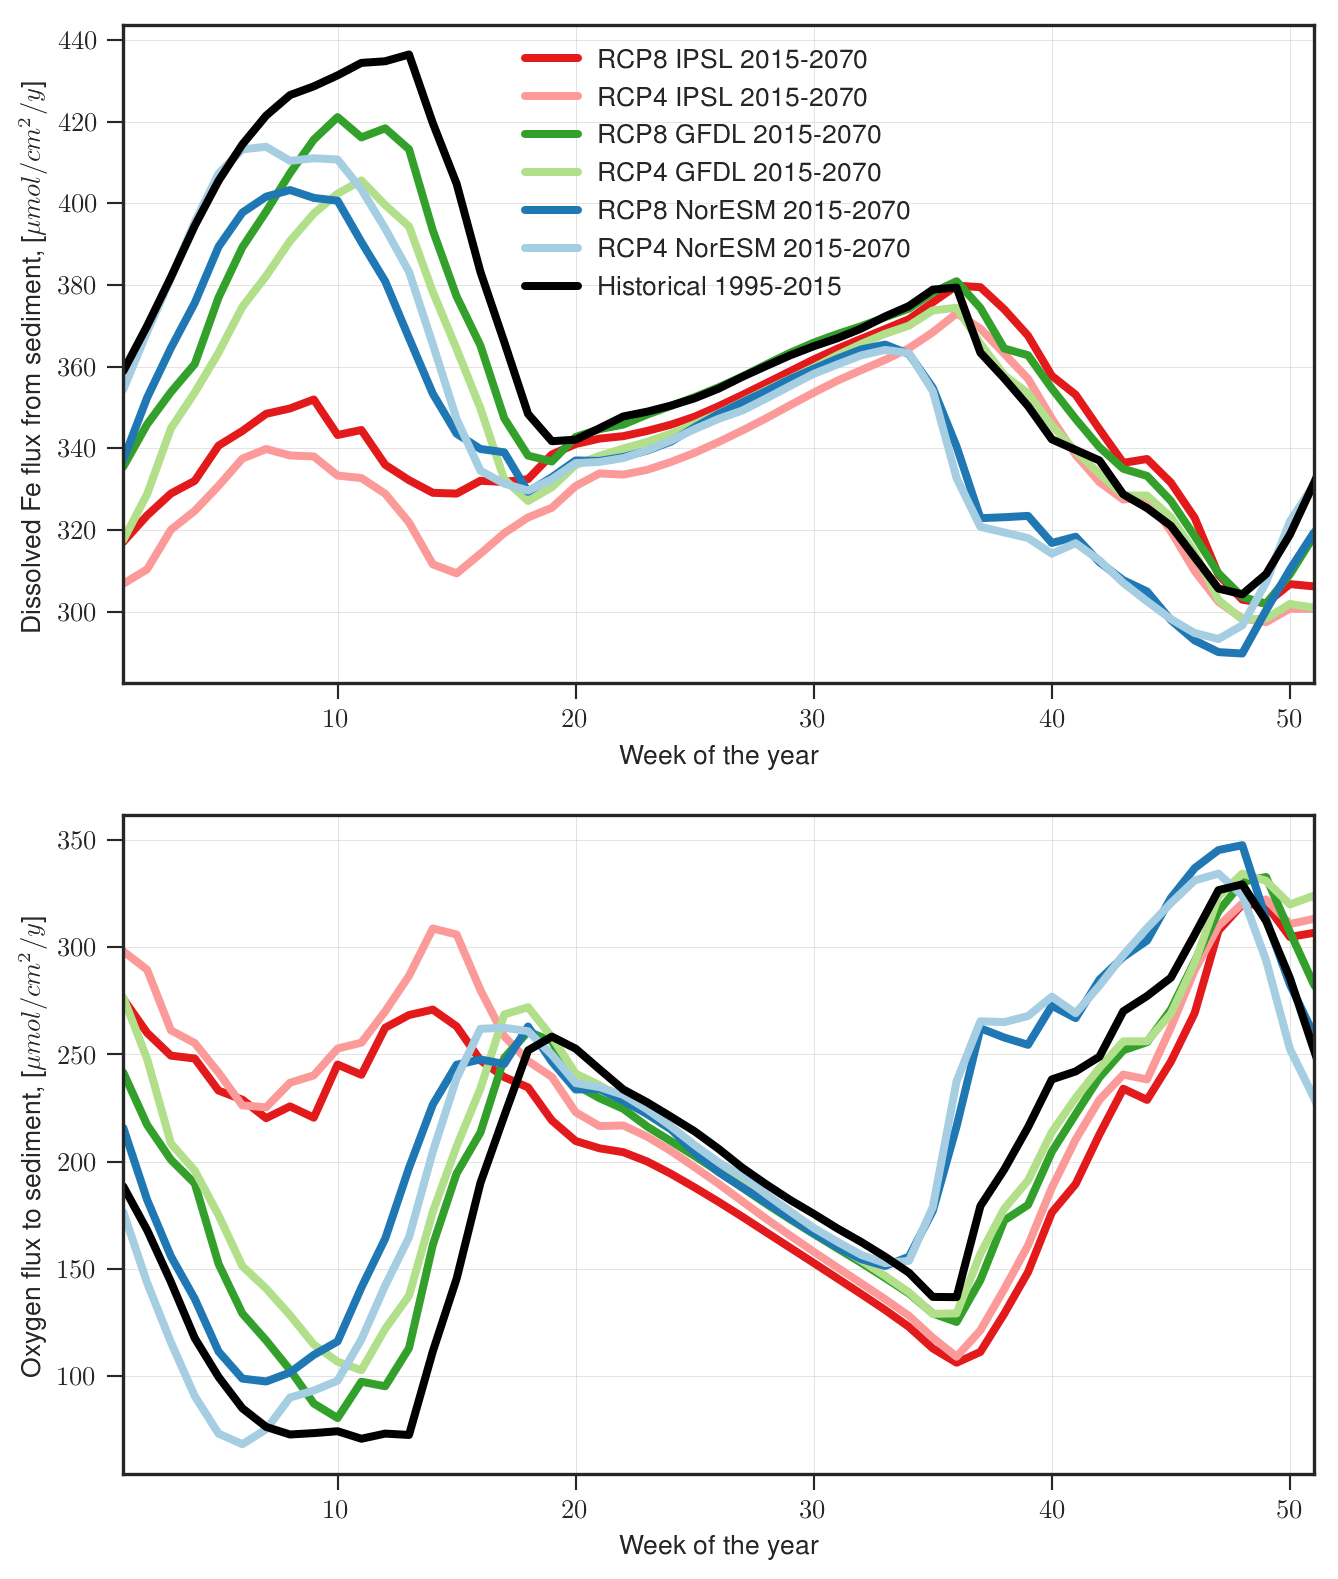

In [202]:
plt.figure(figsize=(8,10))
ax0 = plt.subplot(211)


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Fe2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Dissolved Fe flux from sediment, [$\mu mol/cm^2/y$]')
ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
O2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('Oxygen flux to sediment, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

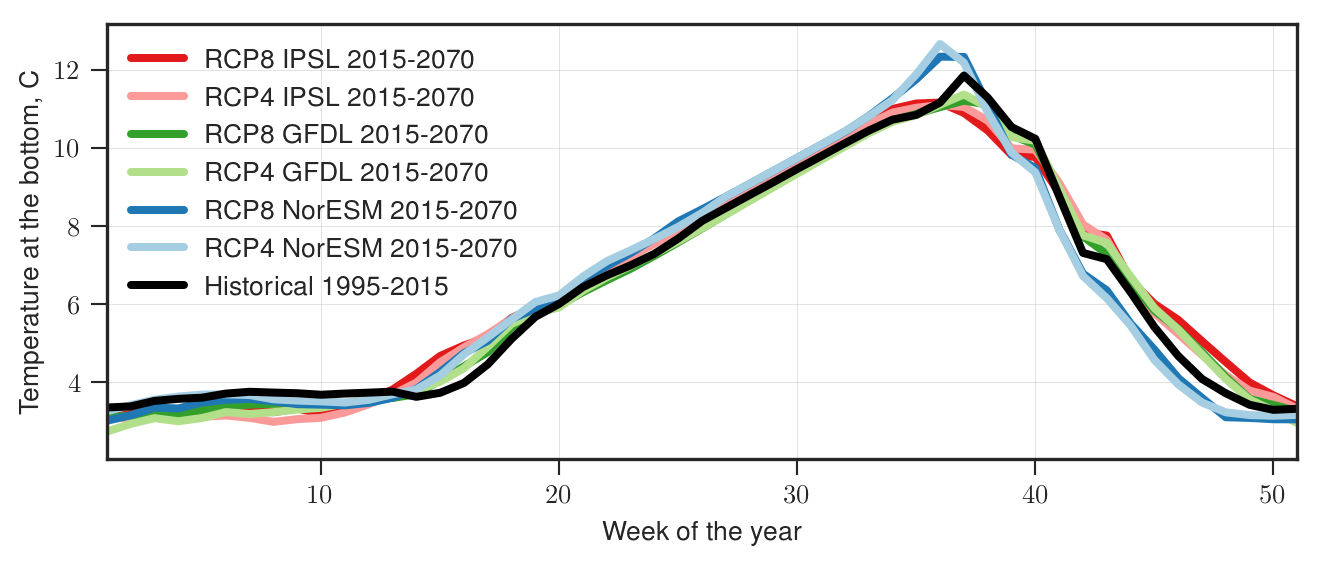

In [203]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
Tsed[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.set_ylabel('Temperature at the bottom, C')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax2.grid(linestyle='-', linewidth=0.2)




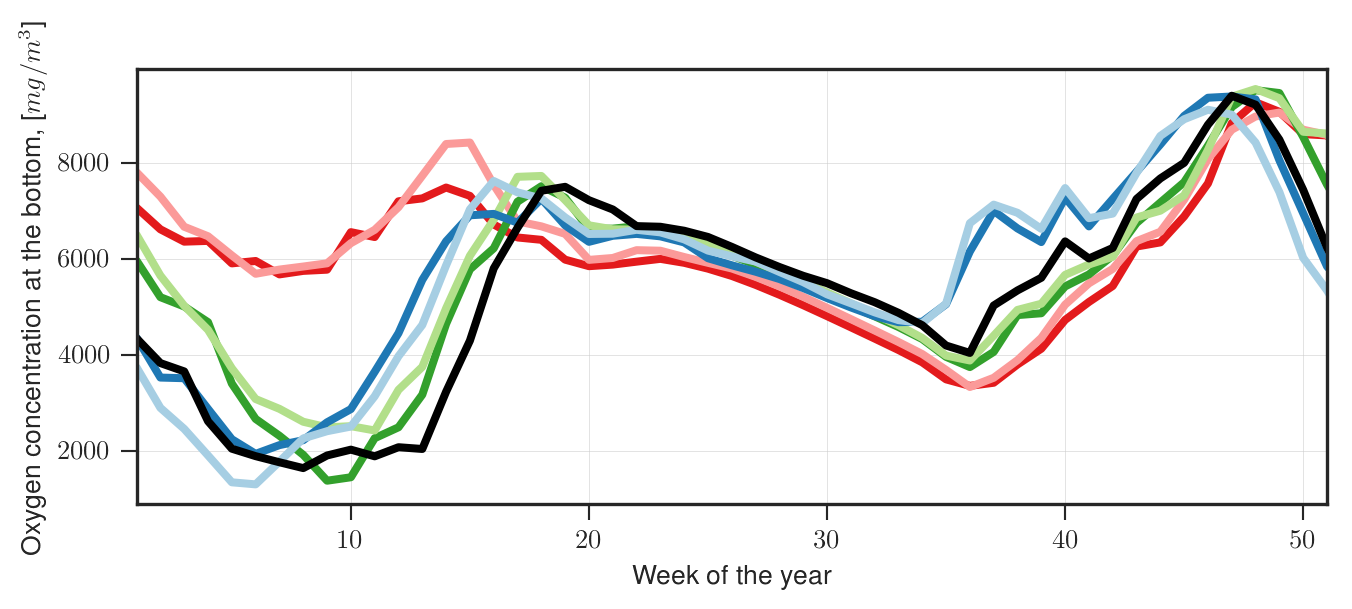

In [204]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.set_ylabel('Oxygen concentration at the bottom, [$mg/m^3$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)
ax2.legend_.remove()

ax2.grid(linestyle='-', linewidth=0.2)



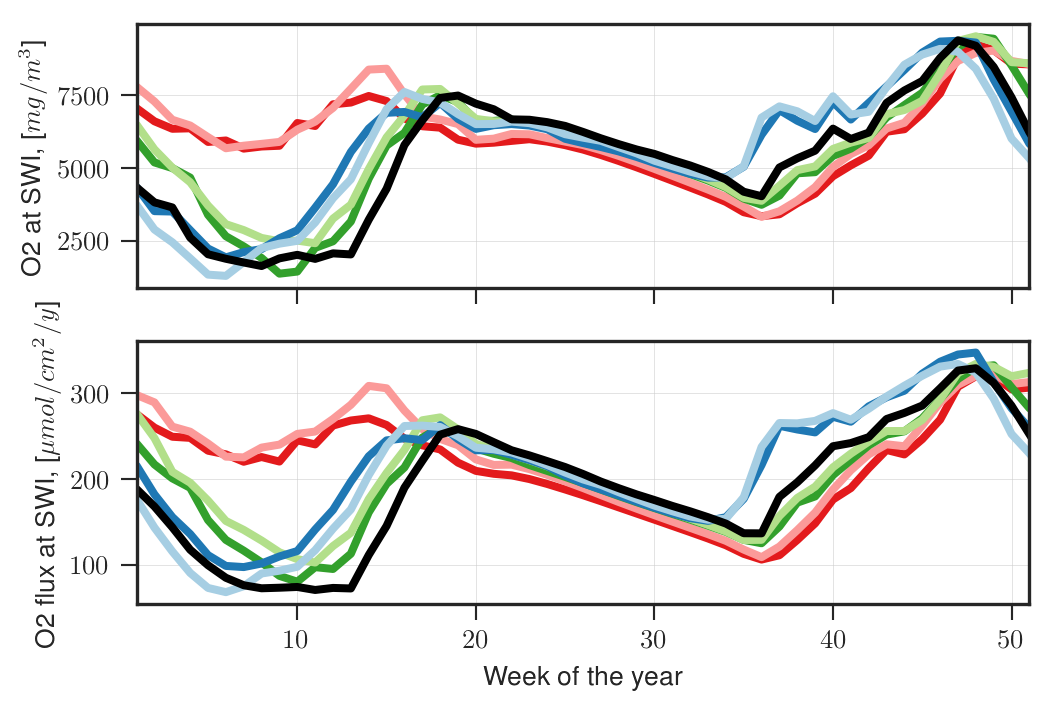

In [205]:
plt.figure(figsize=(8,5))
fig, (ax0, ax2) = plt.subplots(2,1, sharex=True)


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Oxy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', ax=ax0, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel(r'O2 at SWI, [$mg/m^3$]')
ax0.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax0.legend_.remove()
ax0.set_xlim(1,51)

ax2 = plt.subplot(212)
O2_fx[-365*55:].groupby(['WOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('O2 flux at SWI, [$\mu mol/cm^2/y$]')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [206]:
# algae 
Ice_bool.groupby(['DOY']).mean()[names_scen].idxmin().values
# phy_int_yearly

array([131, 130, 127, 123, 132, 125, 127])

In [207]:
Phy.groupby(['DOY']).mean()[names_scen].idxmax()

RCP8 IPSL 2015-2070      199
RCP4 IPSL 2015-2070      198
RCP8 GFDL 2015-2070      193
RCP4 GFDL 2015-2070      193
RCP8 NorESM 2015-2070    200
RCP4 NorESM 2015-2070    187
Historical 1995-2015     196
dtype: int64

In [208]:
from numpy import trapz

In [209]:
names_scen

['RCP8 IPSL 2015-2070',
 'RCP4 IPSL 2015-2070',
 'RCP8 GFDL 2015-2070',
 'RCP4 GFDL 2015-2070',
 'RCP8 NorESM 2015-2070',
 'RCP4 NorESM 2015-2070',
 'Historical 1995-2015']

In [267]:
last_years = 55
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [268]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []

for scen in names_scen:
    ice_days = Ice_bool[scen].mean()*365
    ice_bool_int_yearly.append(ice_days)
    p_int_yearly.append(P_fx[scen].mean())
    pui_int_yearly.append(P_fx[Ice_bool[scen]>0][scen].mean())
    pni_int_yearly.append(P_fx[Ice_bool[scen]==0][scen].mean())
    fe_fx_ui_int_yearly.append(Fe2_fx[Ice_bool[scen]>0][scen].mean())
    fe_fx_ni_int_yearly.append(Fe2_fx[Ice_bool[scen]==0][scen].mean())
    fe_int_yearly.append(Fe2_fx[scen].mean())
    o_int_yearly.append(O2_fx[scen].mean())
    o_ui_int_yearly.append(O2_fx[Ice_bool[scen]==0][scen].mean())
    o_ni_int_yearly.append(O2_fx[Ice_bool[scen]>0][scen].mean())
    oxy_int_yearly.append(Oxy[scen].mean())
    oxy_ui_int_yearly.append(Oxy[Ice_bool[scen]==0][scen].mean())
    oxy_ni_int_yearly.append(Oxy[Ice_bool[scen]>0][scen].mean())
    ice_int_yearly.append(Ice[scen].mean())
    av_T.append(Tair[scen].mean())
    phy_int_yearly.append(Phy[scen].mean())
    Kz_av.append(Kz_mean.mean()[scen]) 

In [269]:
lrs = pd.DataFrame({'Scenarios':names_scen, 
                    'ice thickness':ice_int_yearly, 
                    'ice days':ice_bool_int_yearly, 
                    'phy':phy_int_yearly, 
                    'P flux':p_int_yearly, 
                    'T air':av_T, 
                    'o2 flux':o_int_yearly, 
                    'o2 flux under ice':o_ui_int_yearly, 
                    'o2 flux no ice':o_ni_int_yearly,  
                    'o2 C at SWI':oxy_int_yearly, 
                    'o2 C at SWI under ice':oxy_ui_int_yearly, 
                    'o2 C at SWI no ice':oxy_ni_int_yearly,  
                    'P flux under ice':pui_int_yearly,
                    'P flux no ice':pni_int_yearly,
                    'Fe2 flux under ice':fe_fx_ui_int_yearly,
                    'Fe2 flux no ice':fe_fx_ni_int_yearly,
                    'Kz average':Kz_av,
                    'max ice thickness':max_ice_h,
                    'max grow DOY':max_grow_DOY,
                    'ice break up day':ice_break_up,
                    'Fe2 flux':fe_int_yearly})

In [213]:
lrs

Fe2 flux  Fe2 flux no ice  Fe2 flux under ice  Kz average    P flux  \
0  342.168552       333.223868          404.690495    2.064652  2.208483   
1  332.596391       324.239737          388.862424    2.069796  2.197970   
2  358.341254       341.962989          414.647093    1.848336  2.083256   
3  349.150951       335.194387          400.788956    1.883213  2.027087   
4  344.518882       329.029587          393.292881    1.861551  1.943078   
5  348.279025       328.563979          402.150029    1.797326  1.945978   
6  364.949955       342.861816          419.164941    1.709879  1.898628   

   P flux no ice  P flux under ice              Scenarios     T air  \
0       2.270680          1.773736    RCP8 IPSL 2015-2070  9.965969   
1       2.242249          1.899833    RCP4 IPSL 2015-2070  9.634021   
2       2.146005          1.867534    RCP8 GFDL 2015-2070  8.291090   
3       2.066690          1.880562    RCP4 GFDL 2015-2070  8.338967   
4       1.999787          1.764508  RCP8 NorESM 2015-2070  7.106472   
5       1.994154          1.814335  RCP4 NorESM 2015-2070  6.904674   
6       1.938433          1.800927   Historical 1995-2015  6.859734   

   ice break up day    ice days  ice thickness  max grow DOY  \
0               131   45.682996       0.025494           199   
1               130   47.199814       0.021532           198   
2               127   82.247238       0.040643           193   
3               123   77.661093       0.039518           193   
4               124   87.975457       0.048426           200   
5               125   97.790163       0.051103           187   
6               127  105.659773       0.078445           196   

   max ice thickness  o2 C at SWI  o2 C at SWI no ice  o2 C at SWI under ice  \
0           0.110276  6036.419497         1986.889687            6615.764323   
1           0.092203  6256.176559         2562.366886            6804.782690   
2           0.186773  5495.711855         1375.823184            6694.106736   
3           0.177069  5728.360798         1743.599286            6805.350122   
4           0.181732  5735.154289         1860.090668            6965.769057   
5           0.194846  5597.336037         1754.611311            7003.649080   
6           0.312283  5332.734989         1807.373276            6769.029402   

      o2 flux  o2 flux no ice  o2 flux under ice       phy  
0  216.202625       94.675047         233.588933  2.292528  
1  227.701027      113.442002         244.670824  2.248699  
2  198.489507       80.423735         232.832527  2.105541  
3  209.013268       95.119248         239.796201  2.101305  
4  214.956402      101.352930         251.033774  1.990594  
5  206.886637       86.358194         250.996151  2.003428  
6  191.767124       80.874922         236.946559  1.988478

In [214]:
lrs.corr()

Fe2 flux  Fe2 flux no ice  Fe2 flux under ice  \
Fe2 flux               1.000000         0.913477            0.918999   
Fe2 flux no ice        0.913477         1.000000            0.938330   
Fe2 flux under ice     0.918999         0.938330            1.000000   
Kz average            -0.849381        -0.569996           -0.611754   
P flux                -0.638884        -0.304771           -0.332790   
P flux no ice         -0.626300        -0.290887           -0.317127   
P flux under ice      -0.164911        -0.057328           -0.164966   
T air                 -0.616827        -0.260818           -0.317775   
ice break up day      -0.331897        -0.097749            0.024621   
ice days               0.771443         0.456761            0.506491   
ice thickness          0.820615         0.563494            0.627386   
max grow DOY          -0.332174        -0.120240           -0.274664   
max ice thickness      0.897870         0.685842            0.720993   
o2 C at SWI           -0.949877        -0.757643           -0.782839   
o2 C at SWI no ice    -0.773440        -0.720510           -0.684687   
o2 C at SWI under ice -0.132480        -0.504745           -0.439041   
o2 flux               -0.994169        -0.887194           -0.922252   
o2 flux no ice        -0.912219        -0.827064           -0.923655   
o2 flux under ice     -0.412930        -0.733755           -0.663832   
phy                   -0.619326        -0.280683           -0.296217   

                       Kz average    P flux  P flux no ice  P flux under ice  \
Fe2 flux                -0.849381 -0.638884      -0.626300         -0.164911   
Fe2 flux no ice         -0.569996 -0.304771      -0.290887         -0.057328   
Fe2 flux under ice      -0.611754 -0.332790      -0.317127         -0.164966   
Kz average               1.000000  0.932443       0.926906          0.218086   
P flux                   0.932443  1.000000       0.997391          0.359291   
P flux no ice            0.926906  0.997391       1.000000          0.318116   
P flux under ice         0.218086  0.359291       0.318116          1.000000   
T air                    0.931475  0.983637       0.974757          0.342420   
ice break up day         0.644569  0.753968       0.755255          0.007842   
ice days                -0.989640 -0.964255      -0.956653         -0.260133   
ice thickness           -0.934717 -0.899805      -0.900716         -0.375467   
max grow DOY             0.484806  0.356940       0.364094         -0.288641   
max ice thickness       -0.940893 -0.854804      -0.856862         -0.274362   
o2 C at SWI              0.955492  0.812513       0.795308          0.235034   
o2 C at SWI no ice       0.658524  0.484228       0.444671          0.182452   
o2 C at SWI under ice   -0.407295 -0.637222      -0.641982         -0.136206   
o2 flux                  0.861505  0.647062       0.633786          0.170165   
o2 flux no ice           0.742567  0.502558       0.477174          0.229637   
o2 flux under ice       -0.125646 -0.410376      -0.416697         -0.156172   
phy                      0.928103  0.982099       0.973209          0.293420   

                          T air  ice break up day  ice days  ice thickness  \
Fe2 flux              -0.616827         -0.331897  0.771443       0.820615   
Fe2 flux no ice       -0.260818         -0.097749  0.456761       0.563494   
Fe2 flux under ice    -0.317775          0.024621  0.506491       0.627386   
Kz average             0.931475          0.644569 -0.989640      -0.934717   
P flux                 0.983637          0.753968 -0.964255      -0.899805   
P flux no ice          0.974757          0.755255 -0.956653      -0.900716   
P flux under ice       0.342420          0.007842 -0.260133      -0.375467   
T air                  1.000000          0.723064 -0.972773      -0.869719   
ice break up day       0.723064          1.000000 -0.694915      -0.449556   
ice days              -0.972773         -0.694915

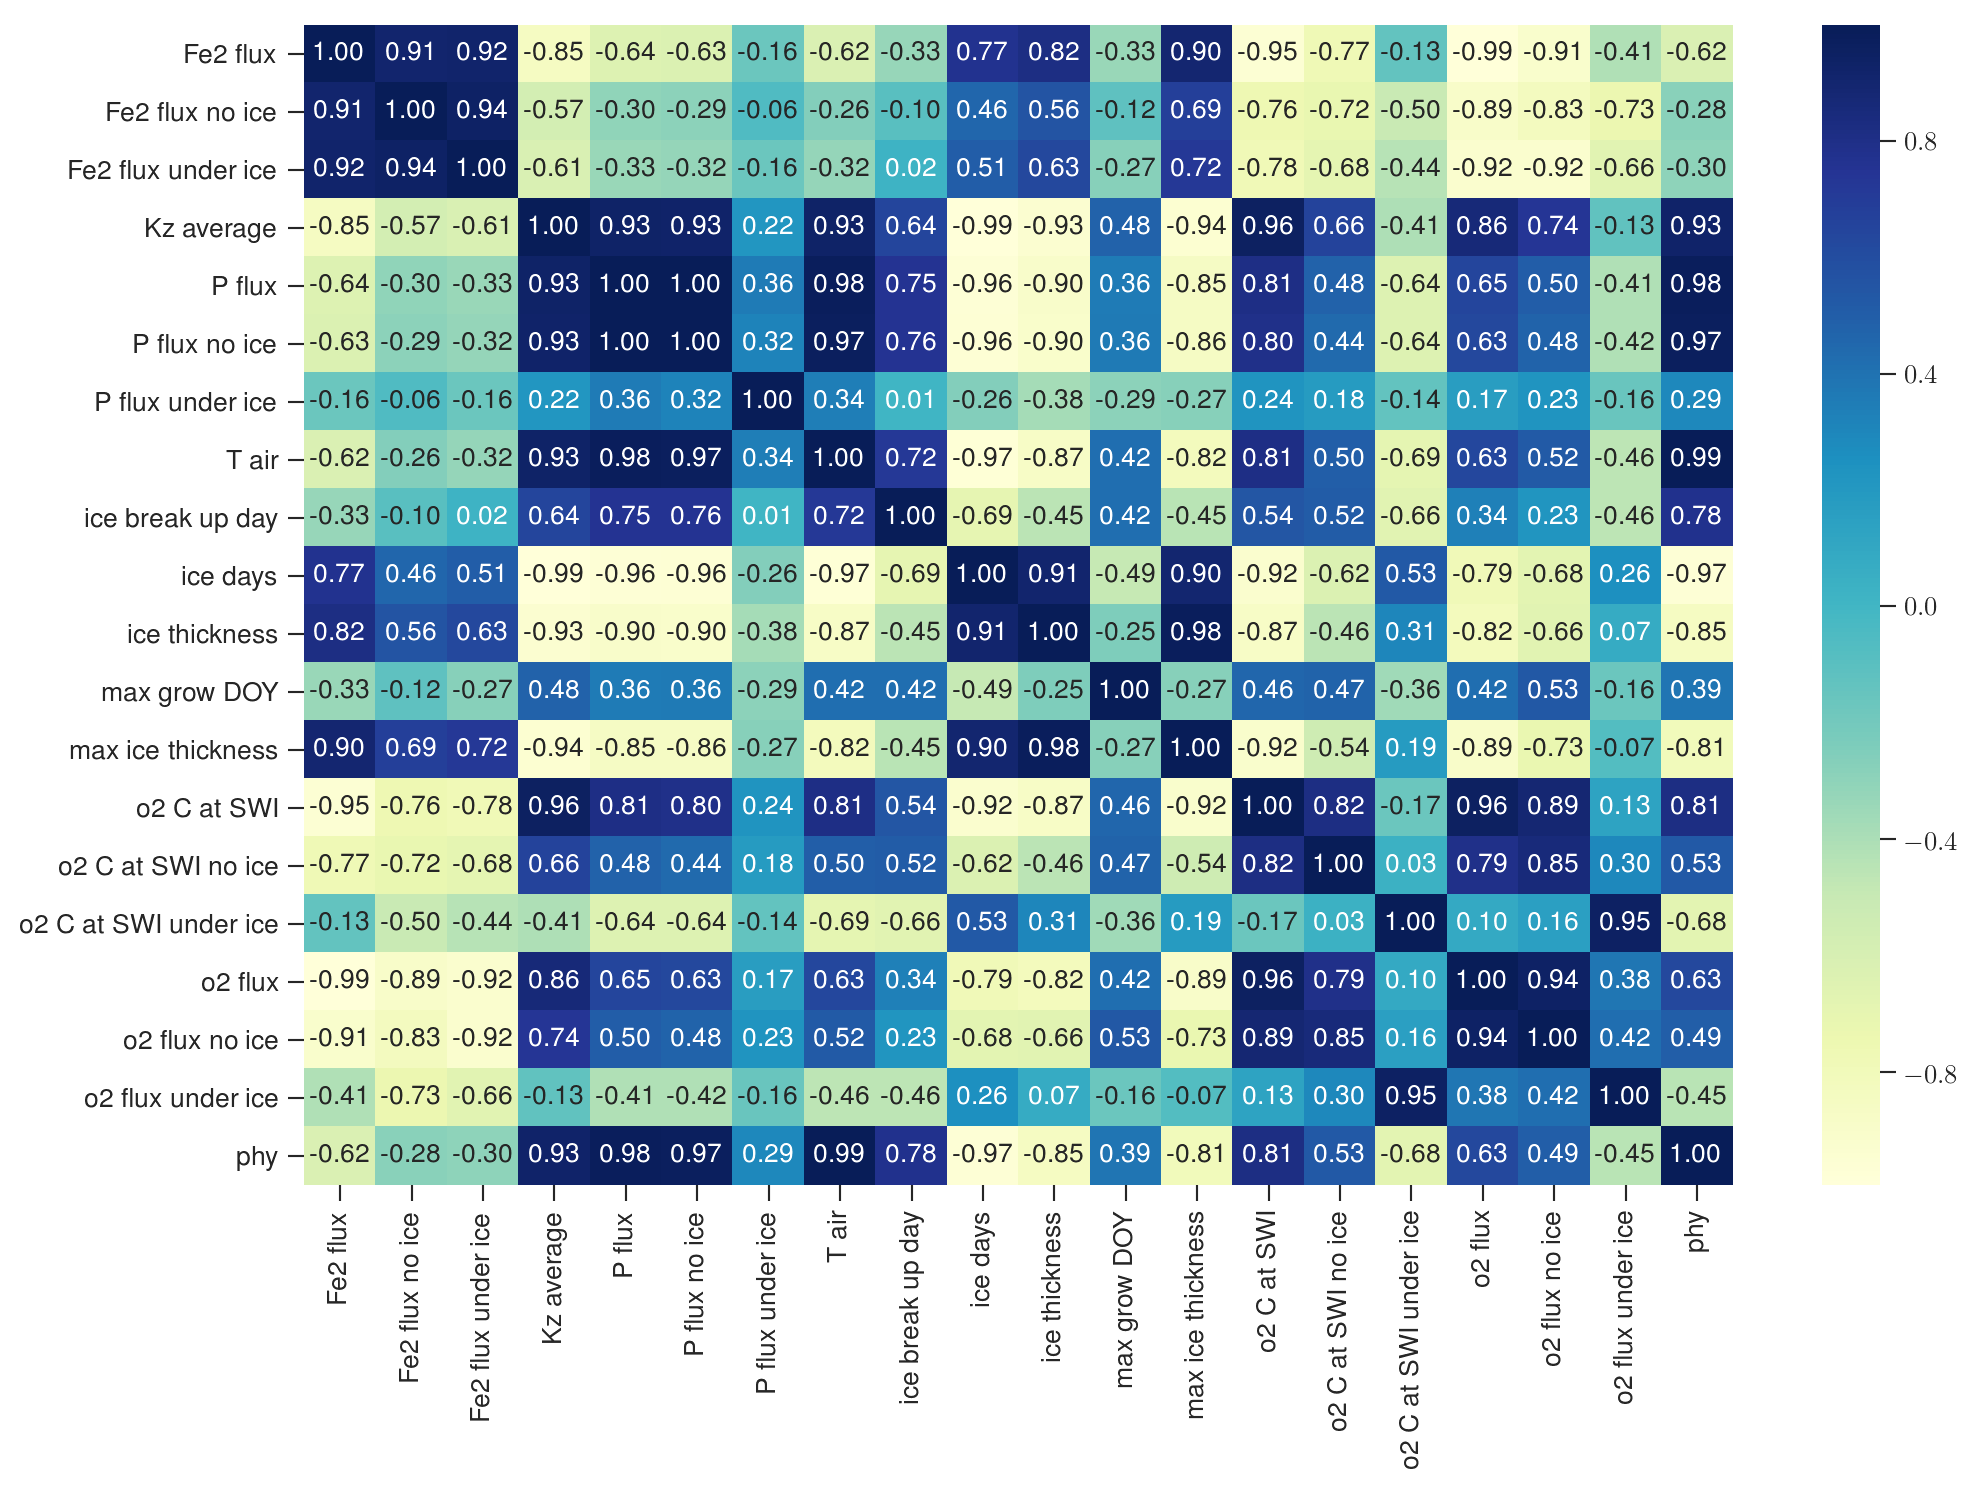

In [215]:
plt.figure(figsize=(12,8))
sns.heatmap(lrs.corr(), xticklabels=lrs.corr().columns, yticklabels=lrs.corr().columns, center=0,  annot=True, fmt='.2f', cmap="YlGnBu")

In [216]:
from scipy.stats import linregress
linregress(ice_bool_int_yearly, np.array(phy_int_yearly))

LinregressResult(slope=-0.005160214087271597, intercept=2.505549654877649, rvalue=-0.9681483086135907, pvalue=0.0003418487440356181, stderr=0.0005968098565153082)

Text(0,0.5,'Phytoplankton yearly average, mg/m3')

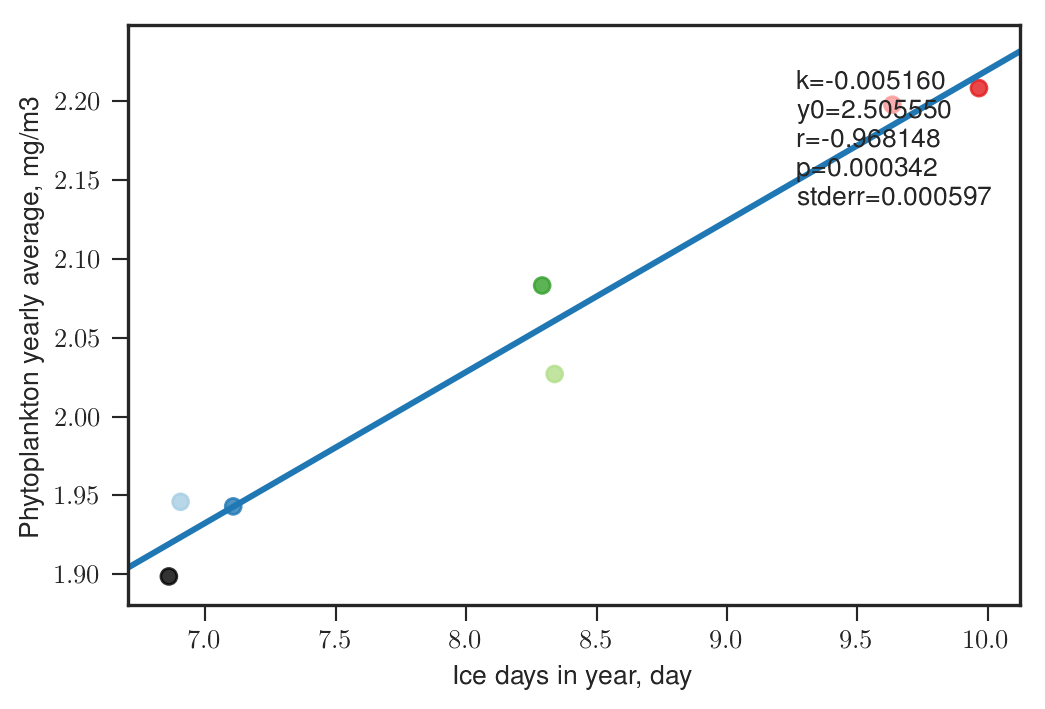

In [217]:
# plt.scatter(, np.array(p_int_yearly))
x,y = np.array(av_T), np.array(p_int_yearly)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(ice_bool_int_yearly), np.array(phy_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Phytoplankton yearly average, mg/m3')

Text(0,0.5,'Phytoplankton yearly average, mg/m3')

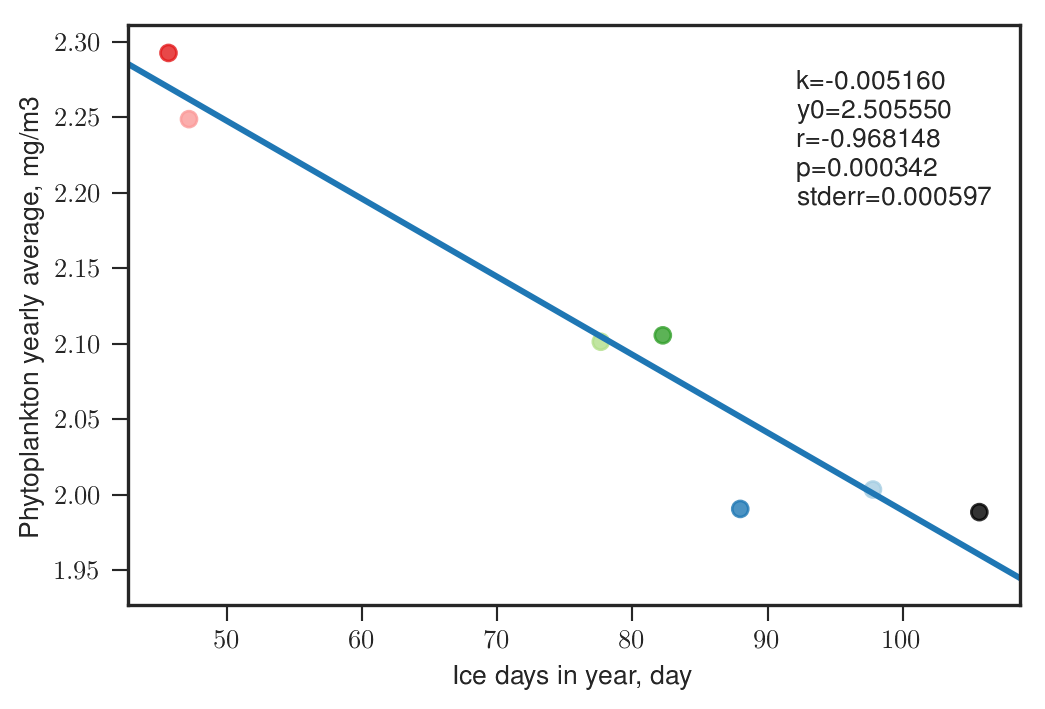

In [218]:
# plt.scatter(ice_bool_int_yearly, np.array(phy_int_yearly))
x,y = np.array(ice_bool_int_yearly), np.array(phy_int_yearly)
ax = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(ice_bool_int_yearly), np.array(phy_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Phytoplankton yearly average, mg/m3')

Text(0.5,0,'Yearly average air temperature, C')

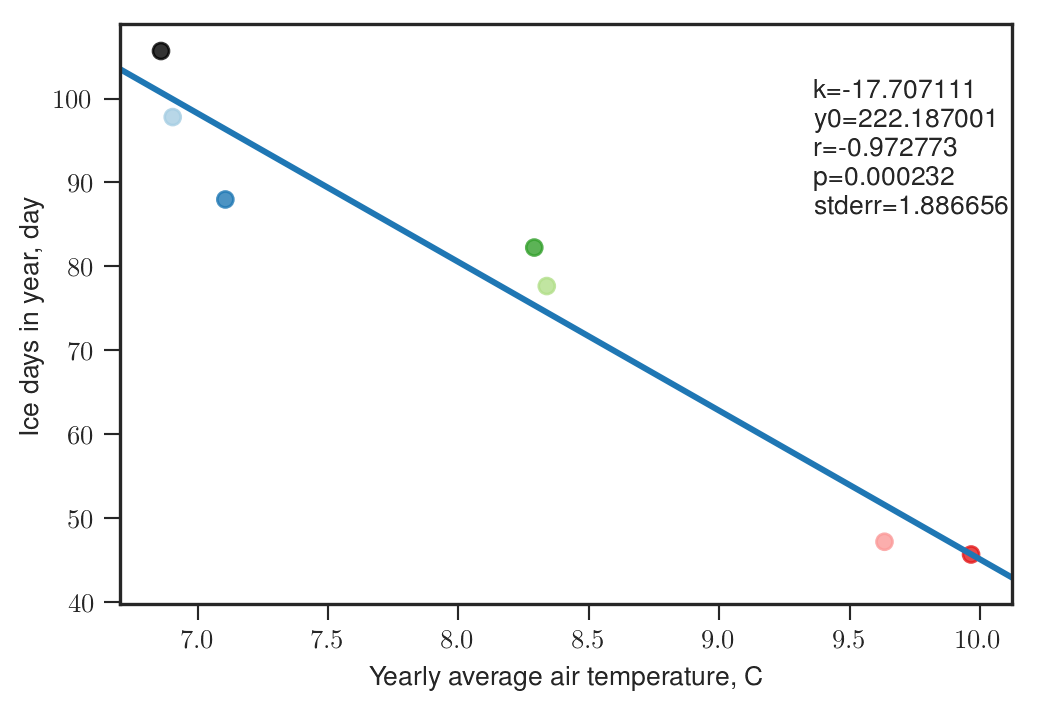

In [219]:
x, y=np.array(av_T), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Ice days in year, day')
plt.xlabel('Yearly average air temperature, C')

Text(0,0.5,'Average P flux from sediment, umol/sq cm/ year')

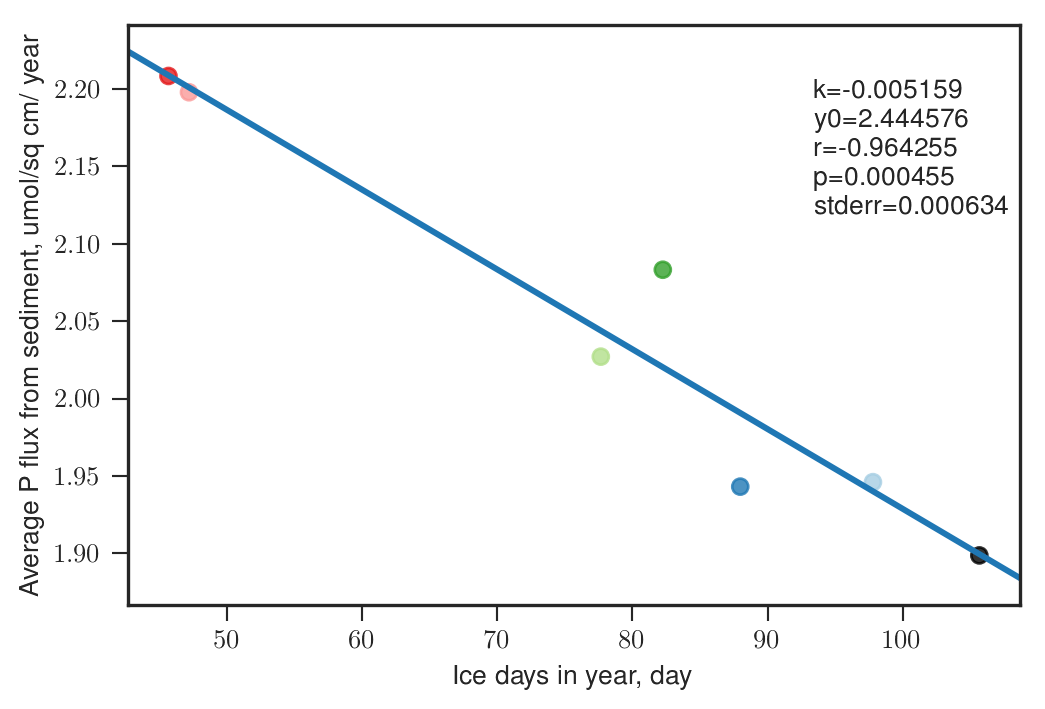

In [220]:
y, x = np.array(p_int_yearly), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Average P flux from sediment, umol/sq cm/ year')


Text(0.5,0,'Air Temperature, C')

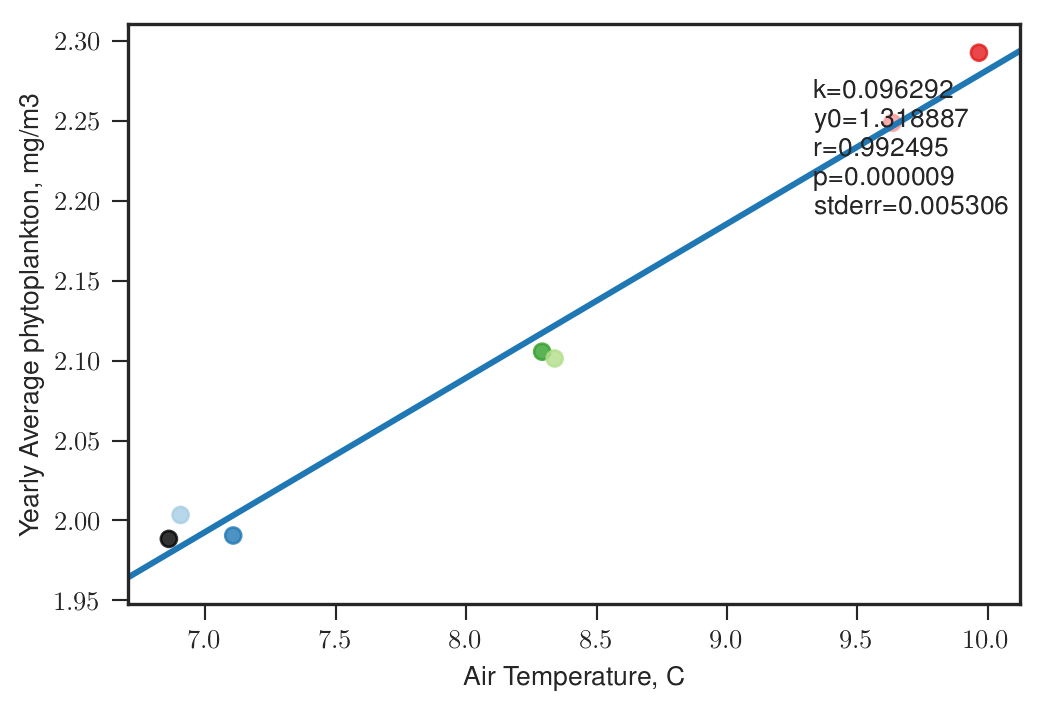

In [221]:
y, x = np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Yearly Average phytoplankton, mg/m3')
plt.xlabel('Air Temperature, C')



Text(0.5,0,'DIP flux during no ice periods, [$umol/cm^2/year$]')

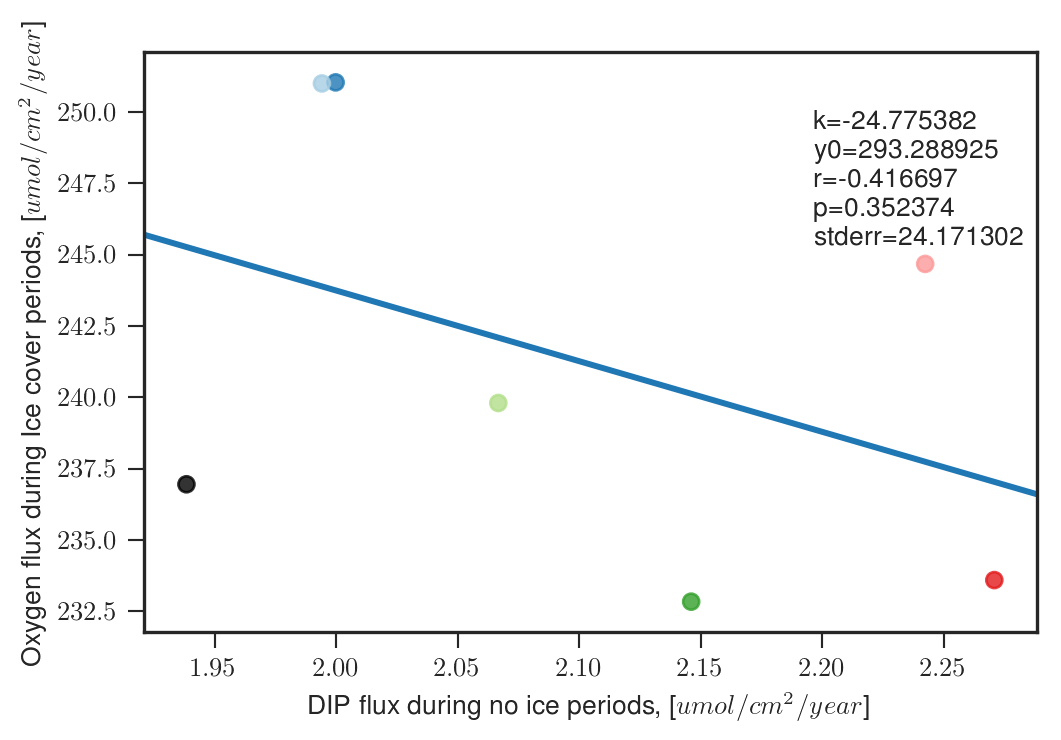

In [222]:
y, x = np.array(o_ui_int_yearly), np.array(pni_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux during Ice cover periods, [$umol/cm^2/year$]')
plt.xlabel('DIP flux during no ice periods, [$umol/cm^2/year$]')

Text(0.5,0,'DIP flux, [$umol/cm^2/year$]')

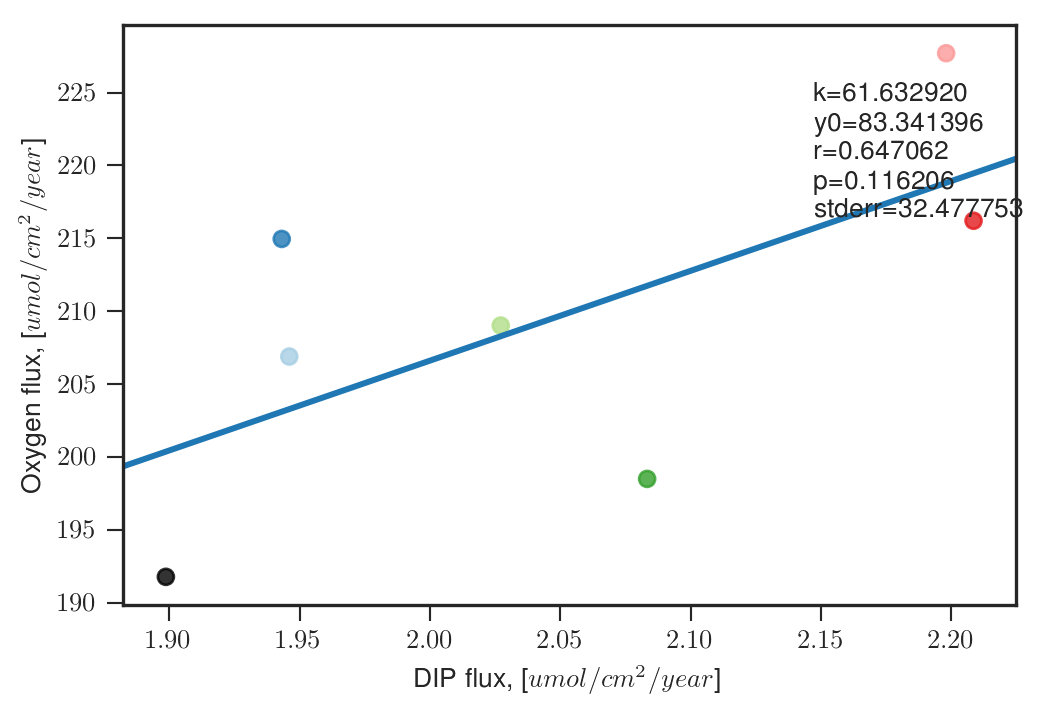

In [223]:
y, x = np.array(o_int_yearly), np.array(p_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen flux, [$umol/cm^2/year$]')
plt.xlabel('DIP flux, [$umol/cm^2/year$]')

Text(0.5,0,'Kz')

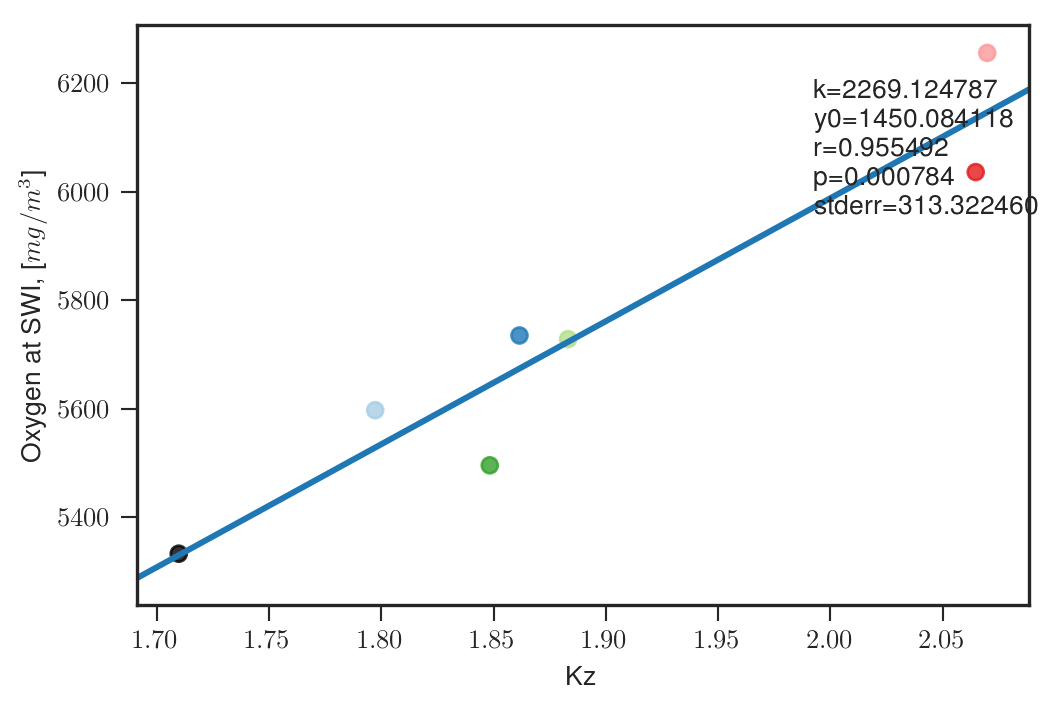

In [224]:
y, x = np.array(oxy_int_yearly), np.array(Kz_av)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Oxygen at SWI, [$mg/m^3$]')
plt.xlabel('Kz')

In [225]:
clr_pltt = sns.color_palette("Paired", 6)[::-1] + [(0,0,0)]

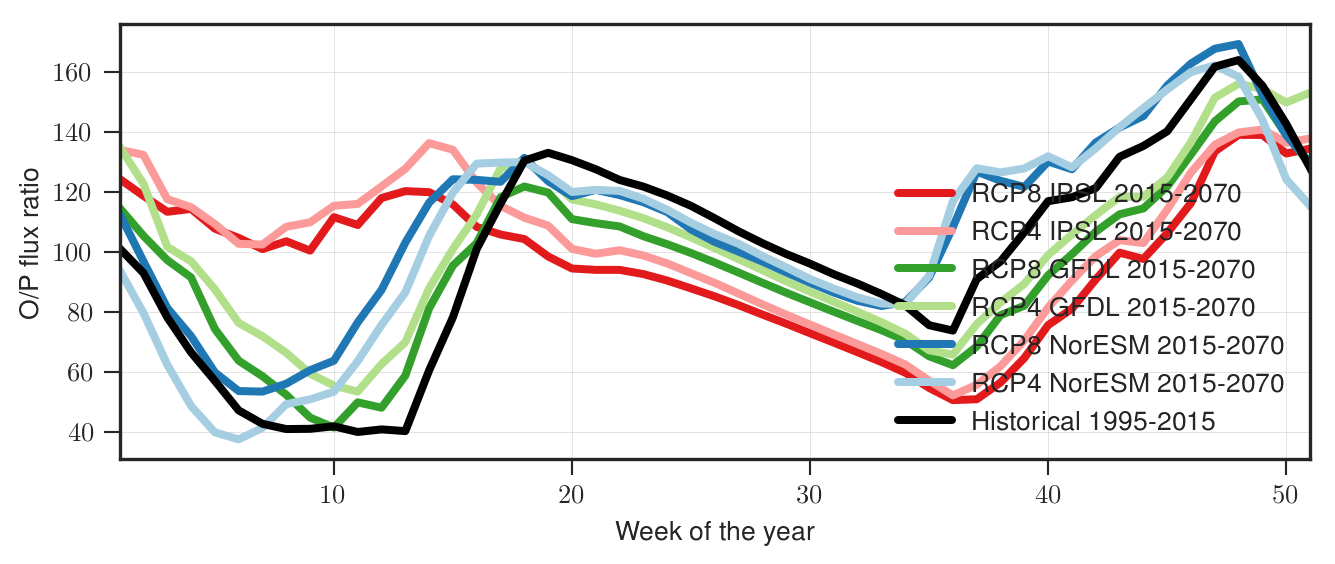

In [226]:
plt.figure(figsize=(8,3))
ax2 = plt.subplot(111)
(O2_fx.groupby(['WOY']).mean()[names_scen]/P_fx.groupby(['WOY']).mean()[names_scen]).plot(linestyle='-', lw=3, ax=ax2, color=sns.color_palette("Paired", 6)[::-1] + [(0,0,0)])
ax2.set_ylabel('O/P flux ratio')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)

ax2.grid(linestyle='-', linewidth=0.2)





Text(0.5,0,'Oxygen at SWI, [$mg/m^3$]')

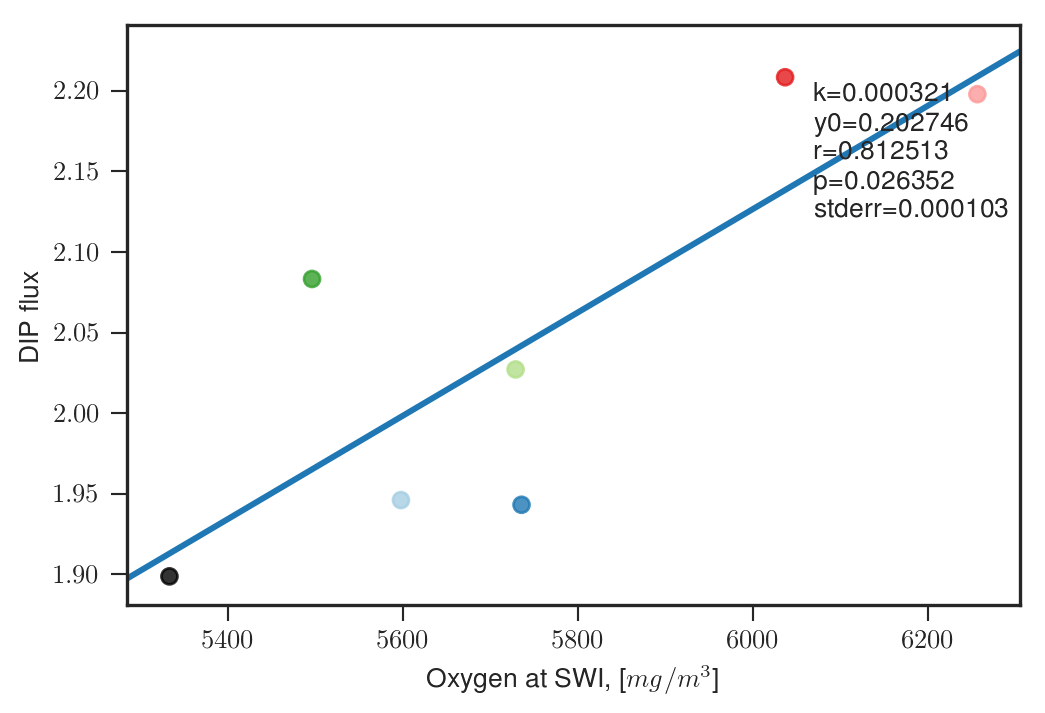

In [227]:
y, x = np.array(p_int_yearly), np.array(oxy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('DIP flux')
plt.xlabel('Oxygen at SWI, [$mg/m^3$]')


Text(0.5,0,'Oxygen no ice at SWI, [$mg/m^3$]')

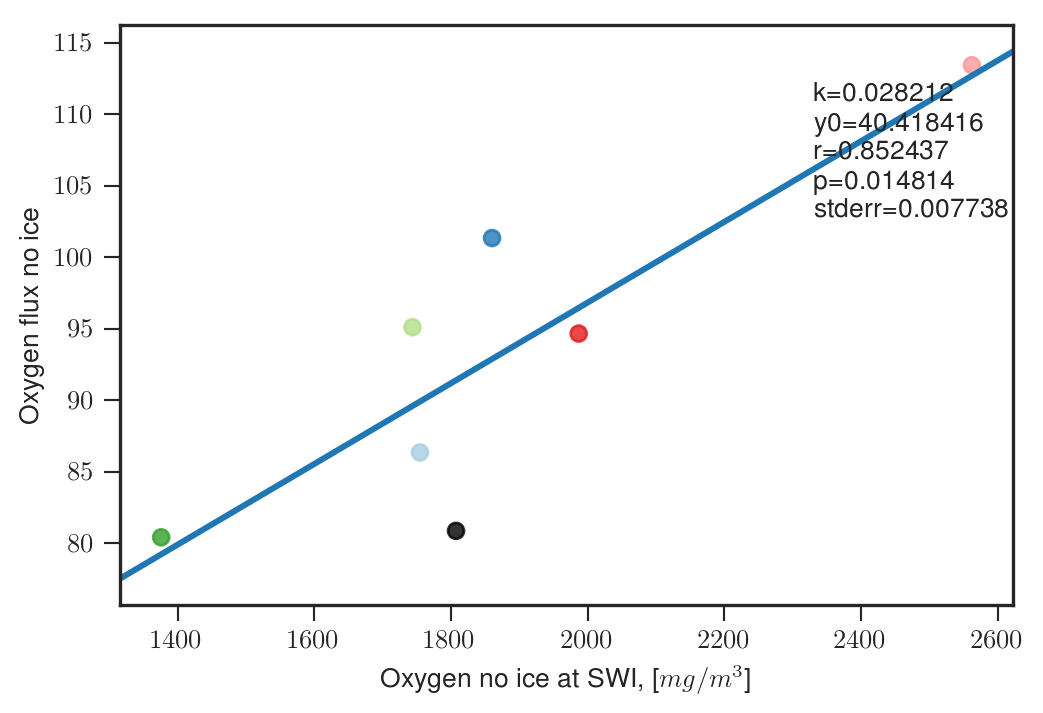

In [228]:
y, x = np.array(o_ni_int_yearly), np.array(oxy_ni_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)

plt.ylabel('Oxygen flux no ice')
plt.xlabel('Oxygen no ice at SWI, [$mg/m^3$]')

In [229]:
pivot = 'WOY'
last_years = 55

tair_grouped = Tair[-365*last_years:].groupby([pivot]).mean()[names_scen]
tw_grouped = Tw_mean[-365*last_years:].groupby([pivot]).mean()[names_scen]
tw_4m_grouped = Tw_4m[-365*last_years:].groupby([pivot]).mean()[names_scen]
ice_grouped = Ice[-365*last_years:].groupby([pivot]).mean()[names_scen]
phy_grouped = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen]
pfx_grouped = P_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
fe2fx_grouped = Fe2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
o2fx_grouped = O2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]
kz_grouped = Kz_mean[-365*last_years:].groupby([pivot]).mean()[names_scen]

for data in [tw_4m_grouped, tair_grouped, ice_grouped, phy_grouped, pfx_grouped, fe2fx_grouped, o2fx_grouped, tw_grouped, kz_grouped]:
    for s in names_scen:
        data[s] = (data[s] - data['Historical 1995-2015'])
        
for data in []:
    for s in names_scen:
        data[s] = (data[s] - data['Historical 1995-2015']) / data['Historical 1995-2015']

In [230]:
fx_convert =  365 * 10**2

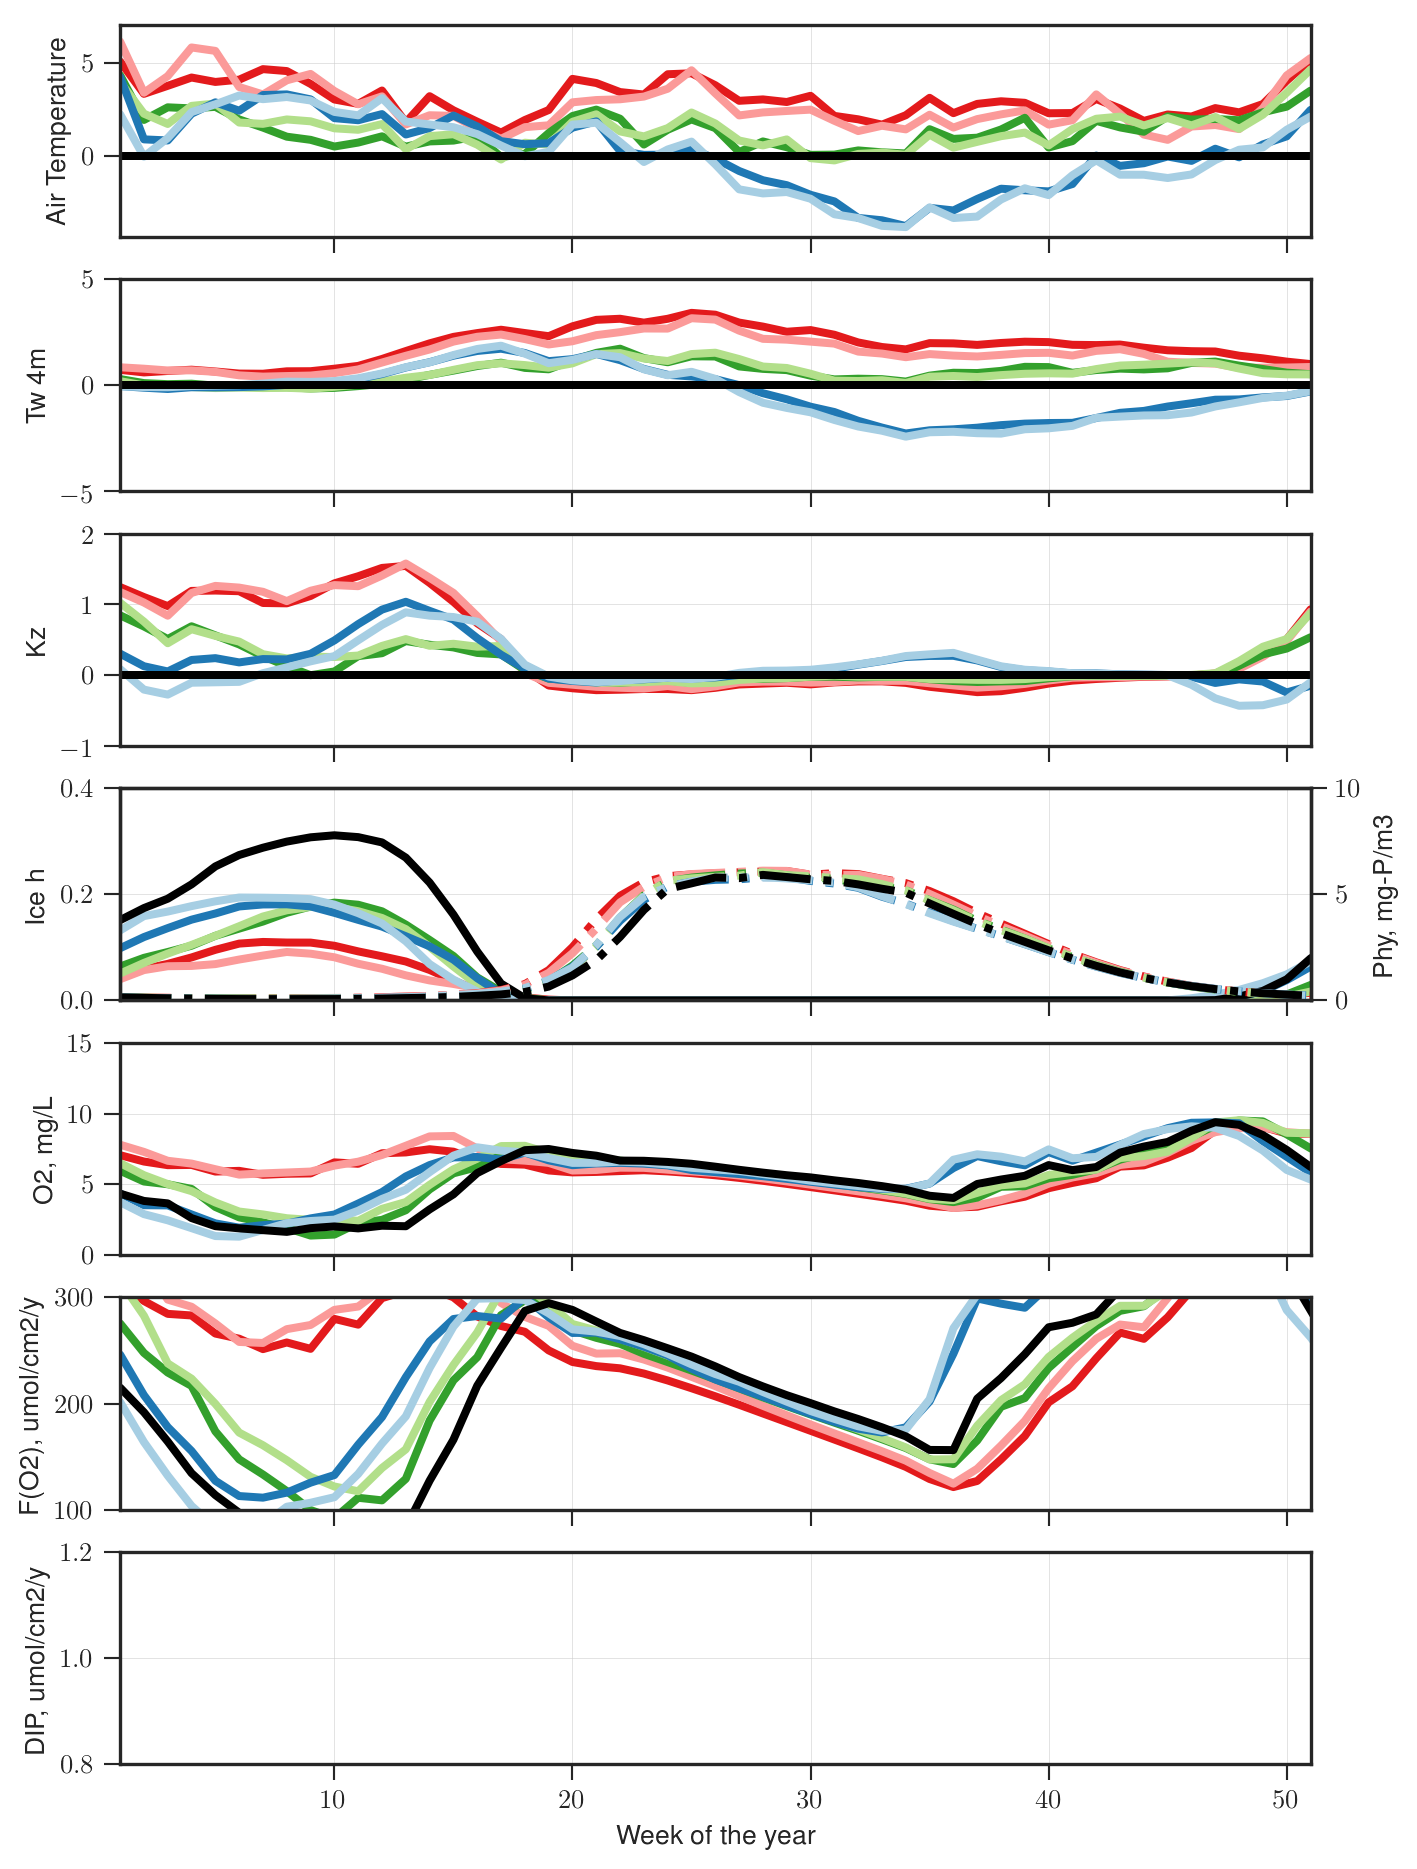

In [231]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7,1, sharex=True, figsize=(8,12))


# Phy[-365*55:].groupby(['WOY']).mean()[names_scen].plot(ax=ax1, lw=3)
tair_grouped.plot(linestyle='-', ax=ax1, lw=3, color=clr_pltt)

# ax1.set_yticks(np.arange(0, 12, 1.0*2))
# ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax1.set_ylabel(r'Air Temperature')
ax1.set_xlabel('Week of the year')
# ax1.legend(frameon=1)
ax1.legend_.remove()
ax1.set_xlim(1,51)


tw_4m_grouped.plot(linestyle='-', ax=ax2, lw=3, color=clr_pltt)
ax2.legend_.remove()
ax2.set_ylabel('Tw 4m')
ax2.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax2.set_xlim(1,51)
ax2.set_ylim(-5,5)


kz_grouped.plot(linestyle='-', ax=ax3, lw=3, color=clr_pltt)
ax3.legend_.remove()
ax3.set_ylabel('Kz')
ax3.set_xlabel('Week of the year')
ax3.set_xlim(1,51)
ax3.set_ylim(-1,2)


Ice[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-', ax=ax4, lw=3, color=clr_pltt)
ax4.legend_.remove()
ax4.set_ylabel('Ice h')
ax4.set_xlabel('Week of the year')
# ax2.set_ylim(0.6, 0.9)
ax4.set_xlim(1,51)
ax4.set_ylim(0,0.4)


ax42 = ax4.twinx()
Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', ax=ax42, lw=3, color=clr_pltt)
ax42.legend_.remove()
ax42.set_ylim(0,10)
ax42.set_ylabel('Phy, mg-P/m3')




(1/1000*Oxy[-365*last_years:].groupby([pivot]).mean()[names_scen]).plot(linestyle='-', ax=ax5, lw=3, color=clr_pltt)
ax5.legend_.remove()
ax5.set_ylabel('O2, mg/L')
ax5.set_xlabel('Week of the year')
ax5.set_xlim(1,51)
ax5.set_ylim(0,15)

(1/32000*fx_convert*O2_fx[-365*last_years:].groupby([pivot]).mean()[names_scen]).plot(linestyle='-', ax=ax6, lw=3, color=clr_pltt)
ax6.legend_.remove()
ax6.set_ylabel('F(O2), umol/cm2/y')
ax6.set_xlabel('Week of the year')
ax6.set_xlim(1,51)
ax6.set_ylim(100,300)


(1/30000*fx_convert*P_fx.groupby(['WOY']).mean()[names_scen]).groupby([pivot]).mean()[names_scen].plot(linestyle='-', ax=ax7, lw=3, color=clr_pltt)
ax7.legend_.remove()
ax7.set_ylabel('DIP, umol/cm2/y')
ax7.set_xlabel('Week of the year')
ax7.set_xlim(1,51)
ax7.set_ylim(0.8,1.2)

ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)
ax3.grid(linestyle='-', linewidth=0.2)
ax4.grid(linestyle='-', linewidth=0.2)
ax5.grid(linestyle='-', linewidth=0.2)
ax6.grid(linestyle='-', linewidth=0.2)
ax7.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

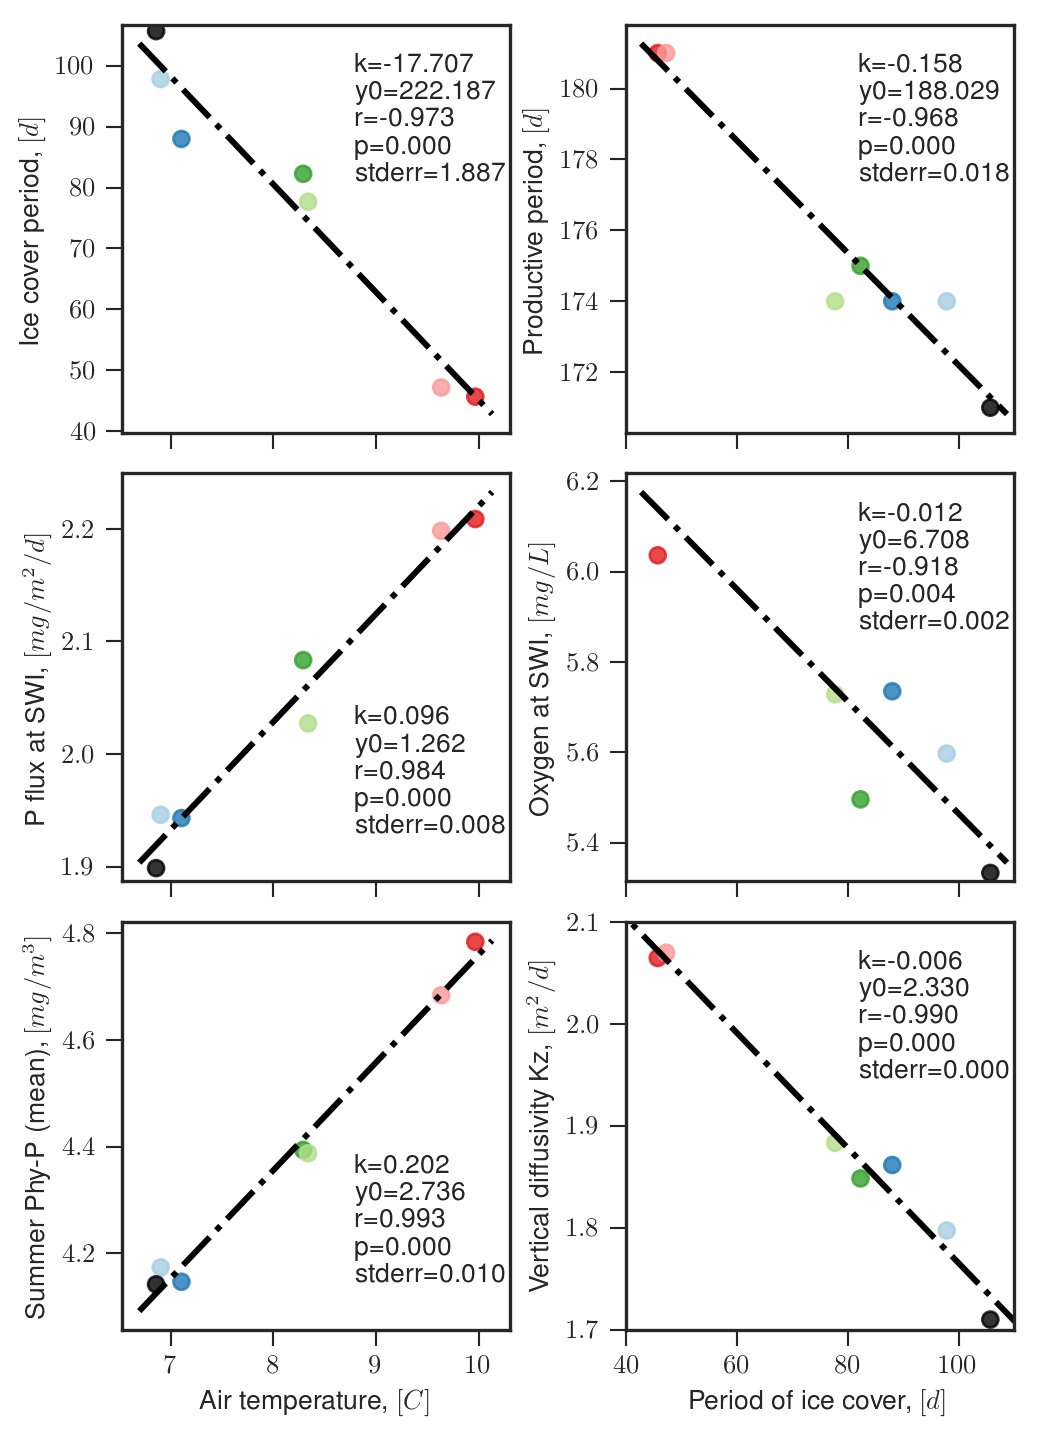

In [301]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(6,9), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax1)
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax1.text(0.6, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax1.transAxes)
ax1.set_ylabel('Ice cover period, $[d]$')
# ax1.set_xlabel('Air temperature, C')


y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax2.text(0.6, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax2.transAxes)
ax2.set_ylabel(r'Productive period, $[d]$')
# ax2.set_xlabel('Period of ice cover, days')



y, x = np.array(p_int_yearly), np.array(av_T)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax3.text(0.6, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax3.transAxes)
# ax3.set_xlabel('Air temperature, C')
ax3.set_ylabel('P flux at SWI, $[mg/m^2/d]$')



y, x = np.array(oxy_int_yearly)*1e-3, np.array(ice_bool_int_yearly)
ax4 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax4.text(0.6, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax4.transAxes)
# ax6.legend_.remove()
ax4.set_ylabel('Oxygen at SWI, $[mg/L]$')

# ax4.set_xlabel('Period of ice cover, days')




y, x = np.array(phy_may_sept_mean), np.array(av_T)
ax5 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax5.text(0.6, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax5.transAxes)
ax5.set_ylabel('Summer Phy-P (mean), $[mg/m^3]$')
ax5.set_xlabel('Air temperature, $[C]$')



y, x = np.array(Kz_av), np.array(ice_bool_int_yearly)

ax6 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax6.text(0.6, 0.9-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax6.transAxes)
# ax5.legend_.remove()
ax6.set_ylabel('Vertical diffusivity Kz, $[m^2/d]$')
ax6.set_xlabel('Period of ice cover, $[d]$')
# ax6.relim()      # make sure all the data fits
# ax6.autoscale()
# ax6.set_xlim(41,108)


for ax in [ax1, ax2,ax3, ax4,ax5, ax6]:
    ax.relim()      # make sure all the data fits
    ax.autoscale()

for ax in [ax2,ax4,ax6]:
    ax.set_xlim(40,110)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels([])

ax6.set_ylim(1.7,2.1)
    
savefig('cc/T/T_scenarios_average_values')

# ax1.grid(linestyle='-', linewidth=0.2)
# ax2.grid(linestyle='-', linewidth=0.2)
# ax3.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [233]:
ax1.lines

(18, 28)

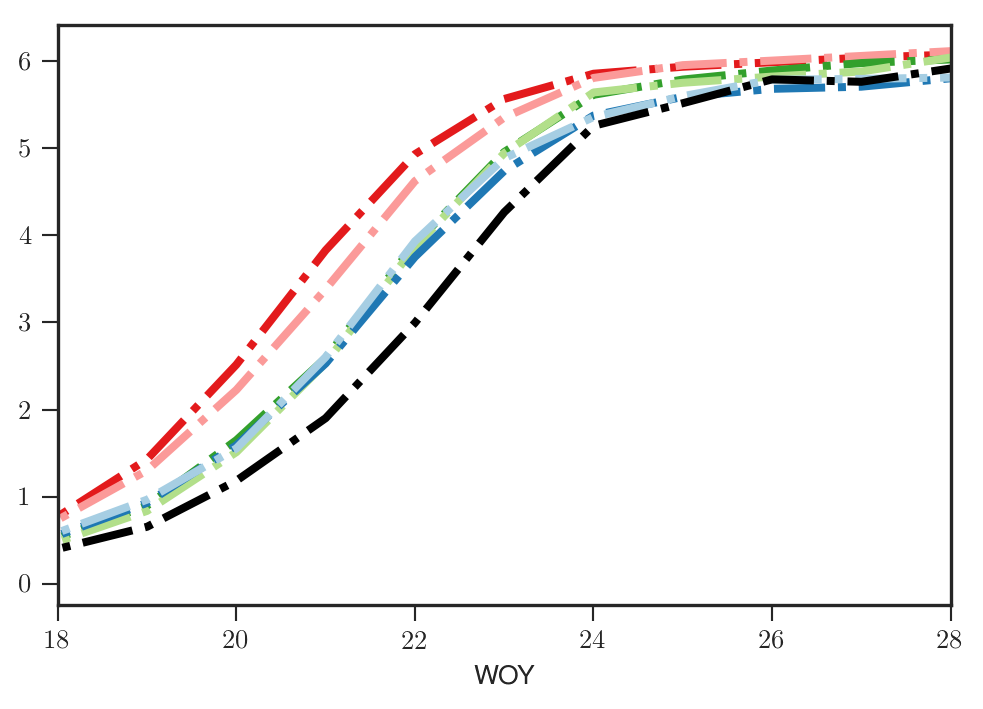

In [234]:
ax = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', lw=3, color=clr_pltt)
ax.legend_.remove()
ax.set_xlim(18,28)

(18, 28)

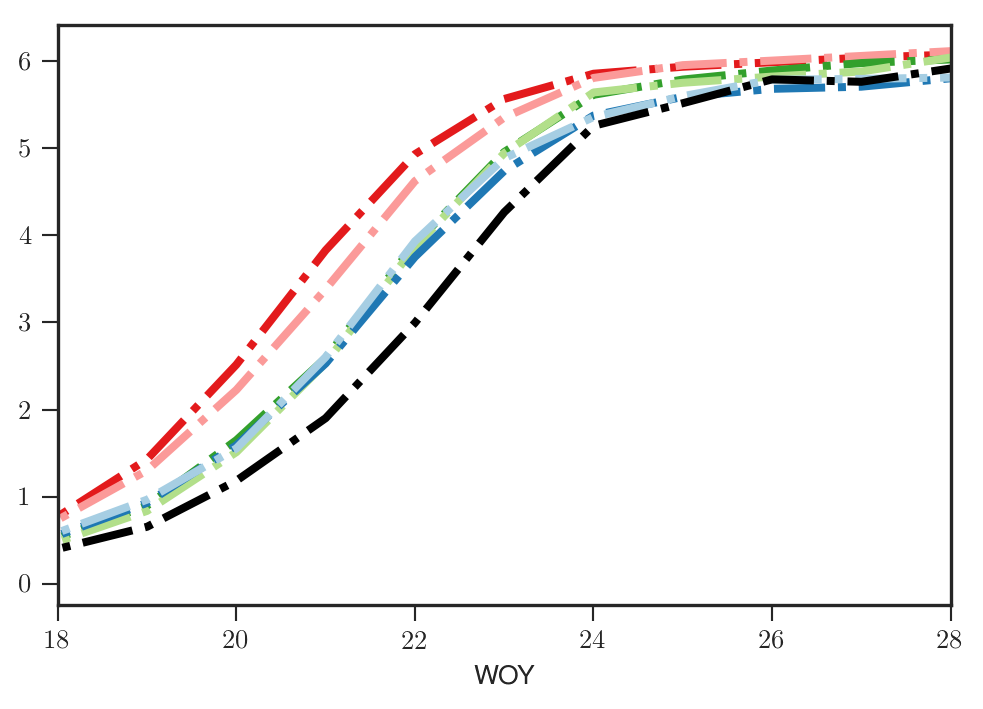

In [235]:
ax = Phy[-365*last_years:].groupby([pivot]).mean()[names_scen].plot(linestyle='-.', lw=3, color=clr_pltt)
ax.legend_.remove()
ax.set_xlim(18,28)

Text(0,0.5,'max grow DOY')

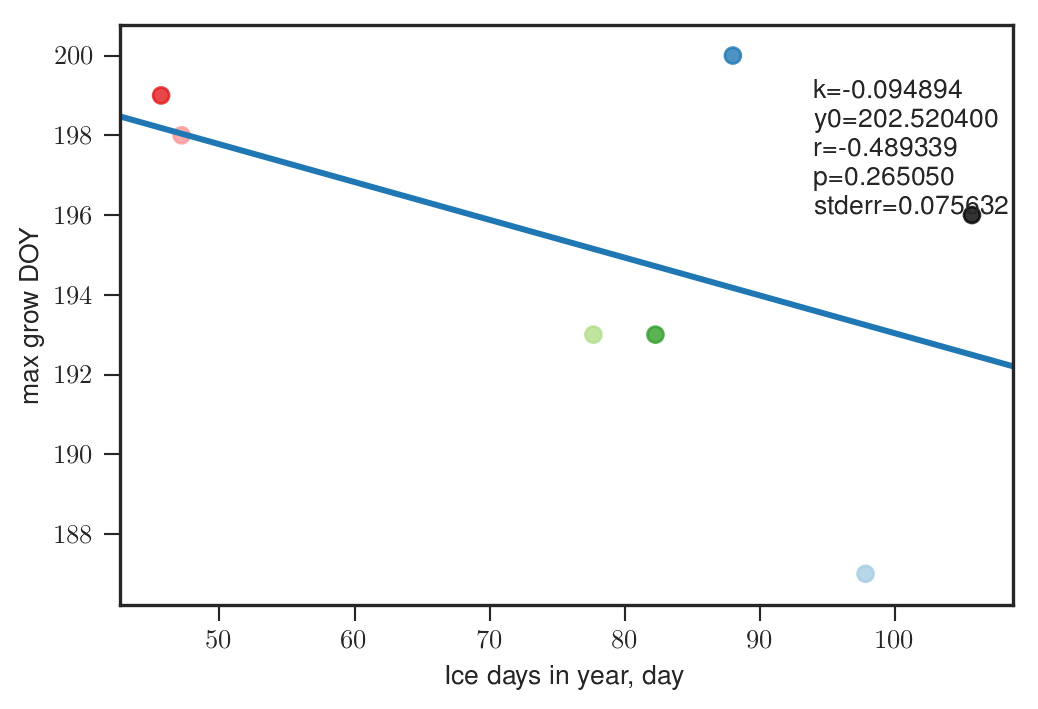

In [236]:
y, x = np.array(max_grow_DOY), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('max grow DOY')

In [237]:
max_ice_h = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].max().values
max_grow_DOY = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmax().values
ice_break_up = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen].idxmin().values

Text(0,0.5,'Day of blooms')

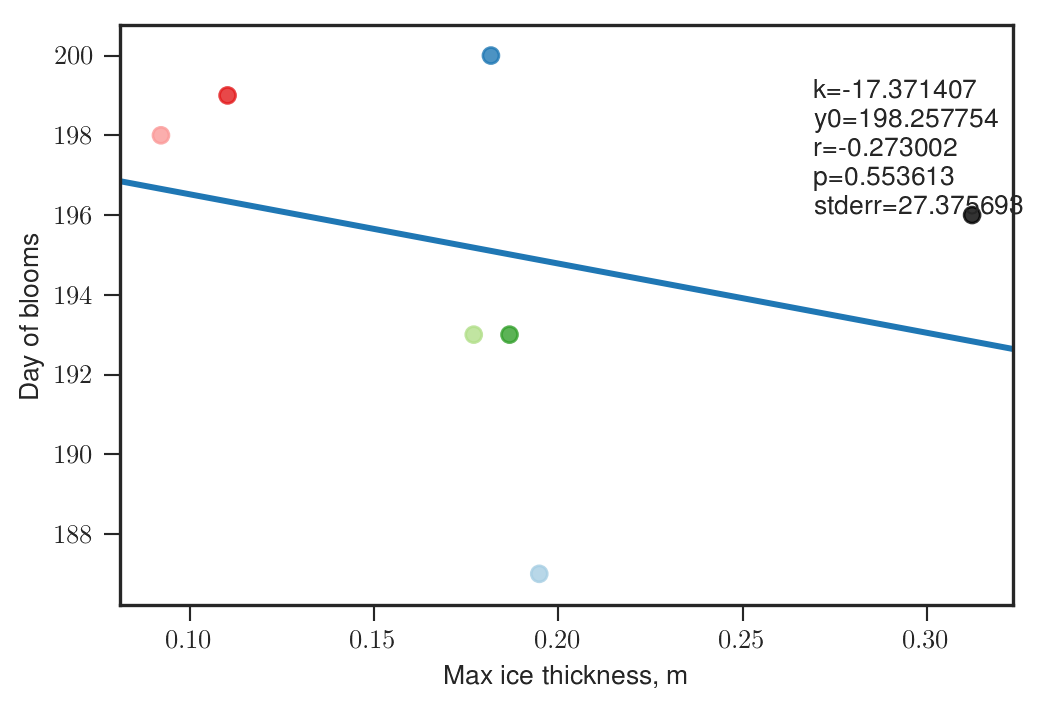

In [238]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Max ice thickness, m')
plt.ylabel('Day of blooms')

Text(0,0.5,'Day of blooms')

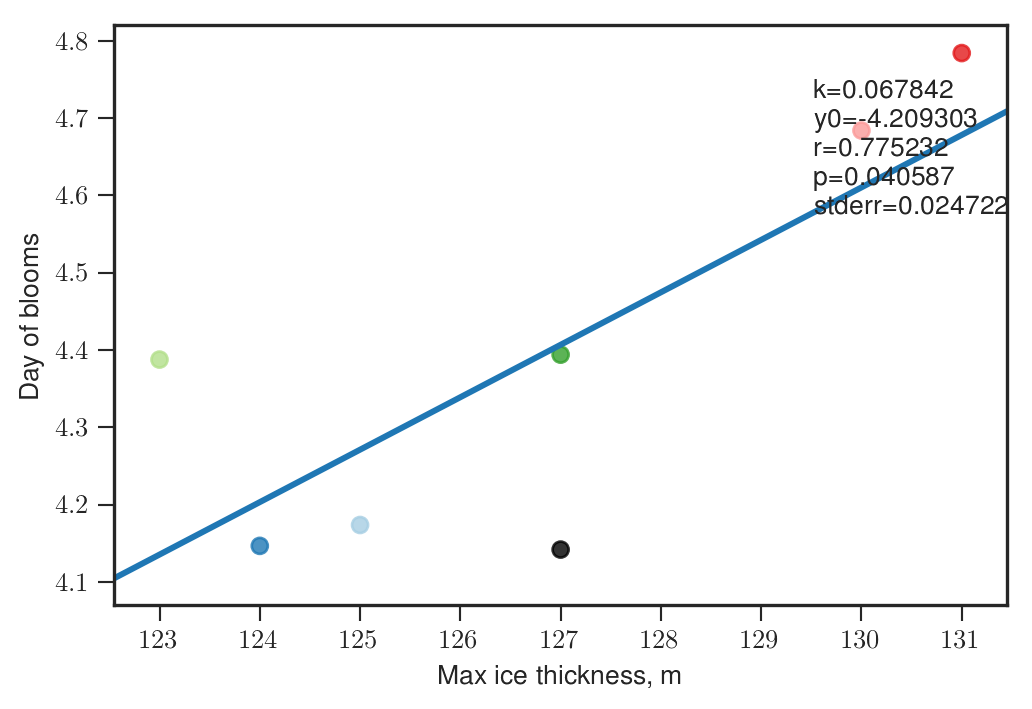

In [239]:
y, x = np.array(phy_may_sept_mean), np.array(ice_break_up)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Max ice thickness, m')
plt.ylabel('Day of blooms')

Text(0,0.5,'Day of blooms')

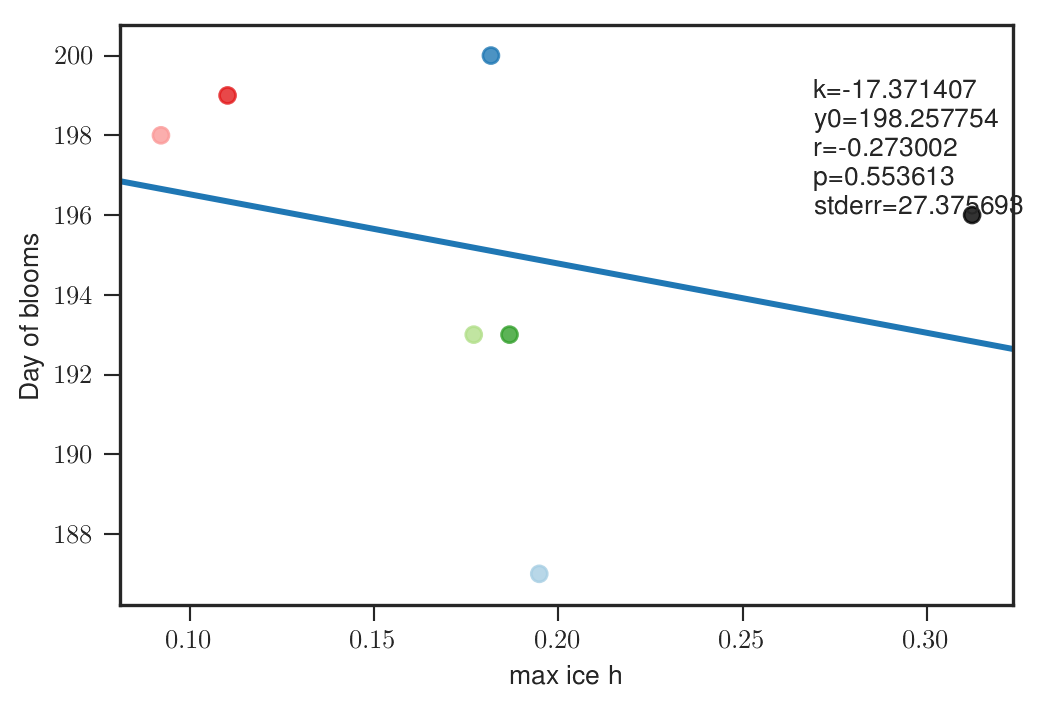

In [240]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('max ice h')
plt.ylabel('Day of blooms')

In [241]:
pd.to_datetime('2000160', format='%Y%j')

Timestamp('2000-06-08 00:00:00')

Text(0,0.5,'Date of the maximum rate of grow')

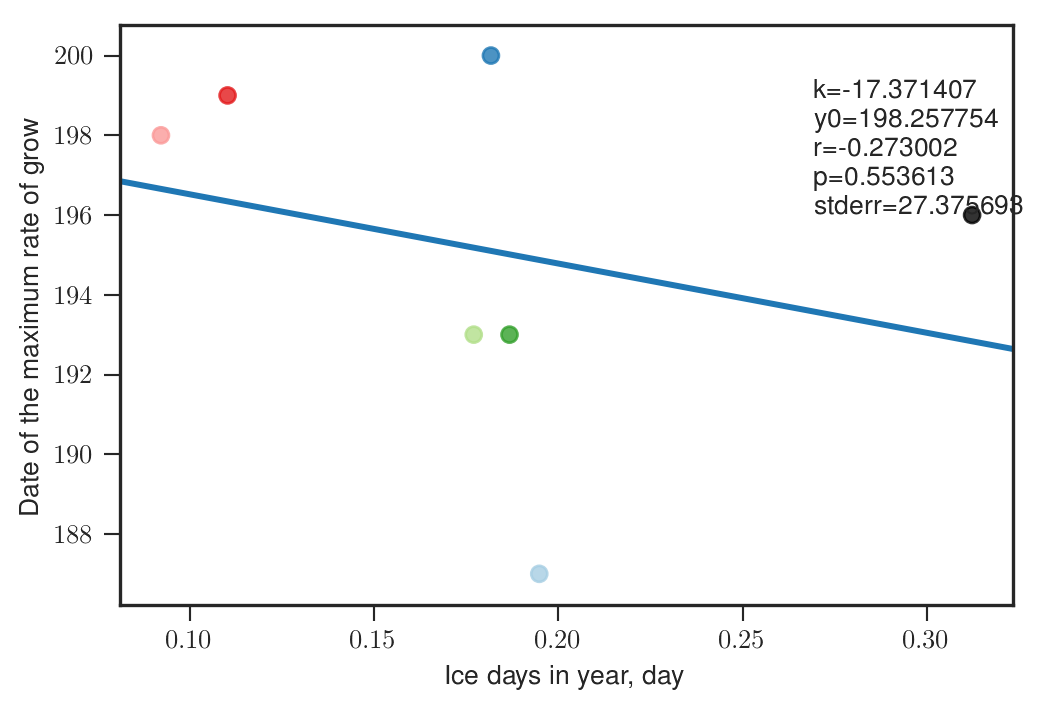

In [242]:
y, x = np.array(max_grow_DOY), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('Date of the maximum rate of grow')
# plt.ylim(2,2.3)

In [243]:
phy_may_sept_mean = Phy[-365*last_years:][(Phy.DOY>120) & (Phy.DOY<275)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Text(0,0.5,'phy may sept mean')

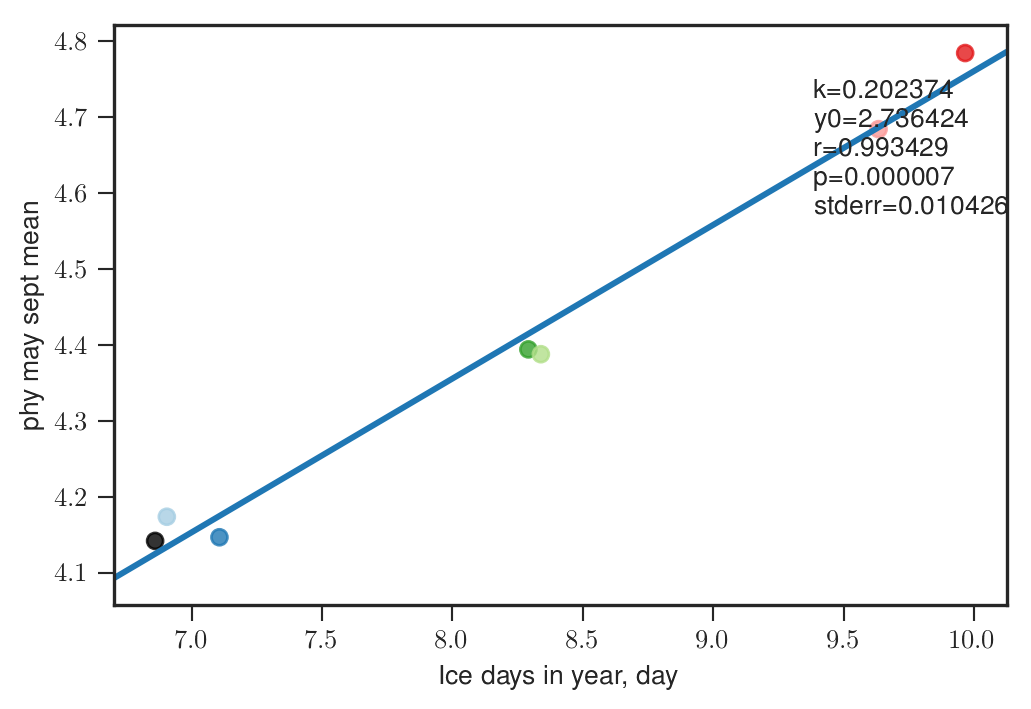

In [244]:
y, x = np.array(phy_may_sept_mean), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Ice days in year, day')
plt.ylabel('phy may sept mean')
# plt.ylim(2,2.3)

In [245]:
phy_mass = 1
days_of_bloom_1mg = ((Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass)[::-1].idxmin() - (Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen] < phy_mass).idxmin()).values

Text(0,0.5,'Phy more than 1 mg/m3, days')

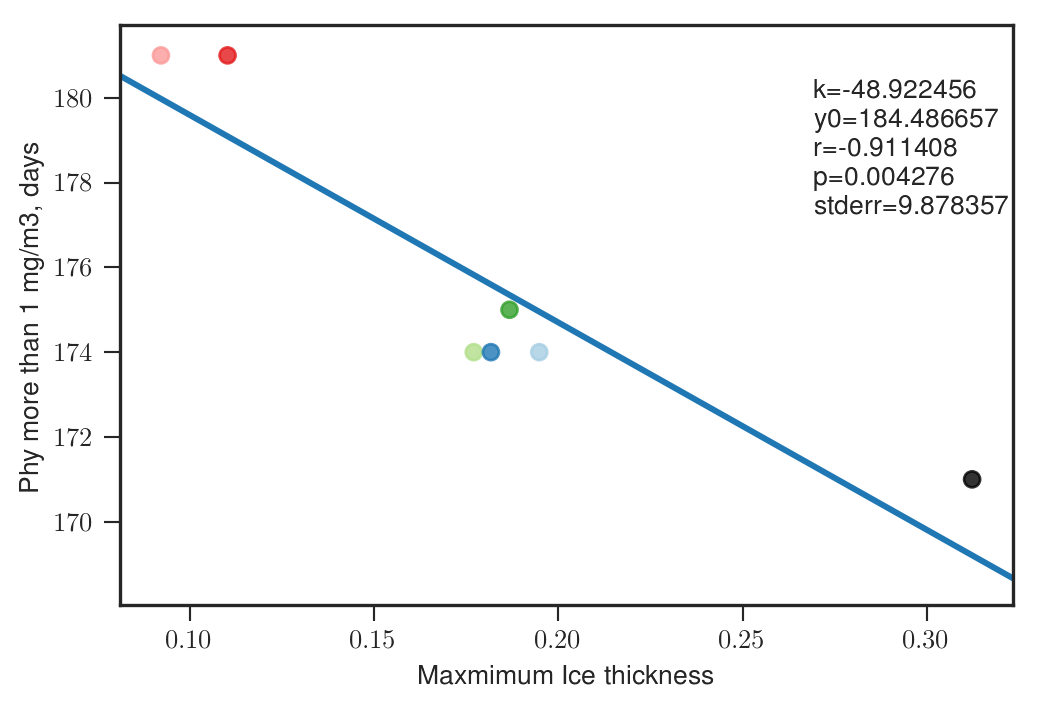

In [246]:
y, x = np.array(days_of_bloom_1mg), np.array(max_ice_h)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.xlabel('Maxmimum Ice thickness')
plt.ylabel('Phy more than 1 mg/m3, days')
# plt.ylim(2,2.3)

Text(0.5,0,'Period with ice cover, days')

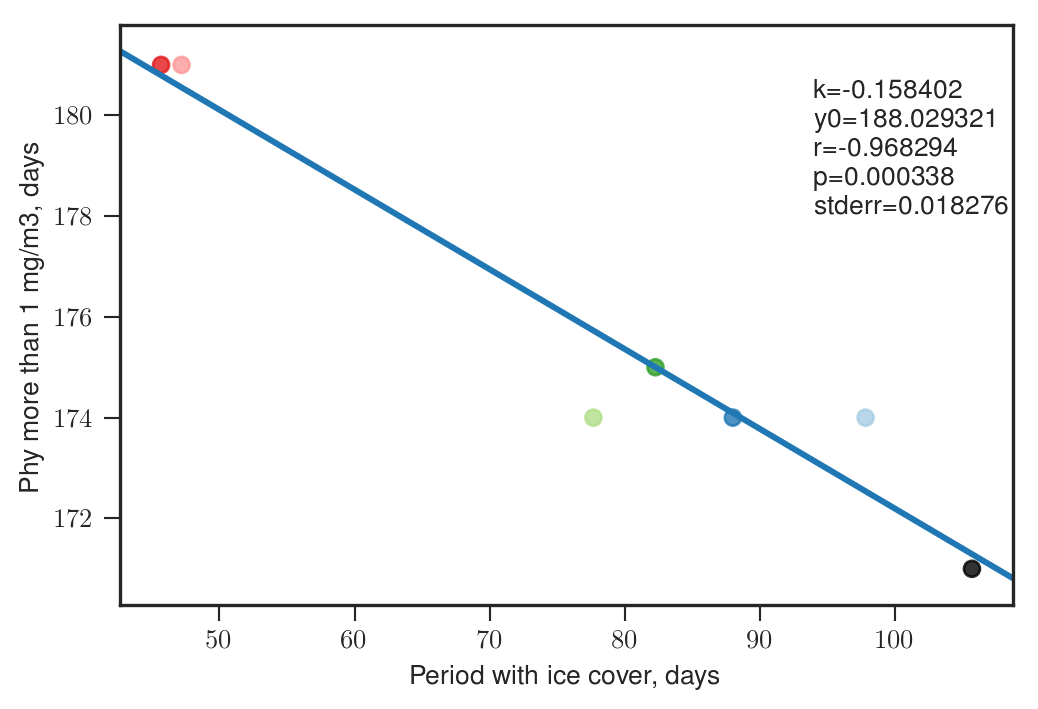

In [247]:
y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Period with ice cover, days')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

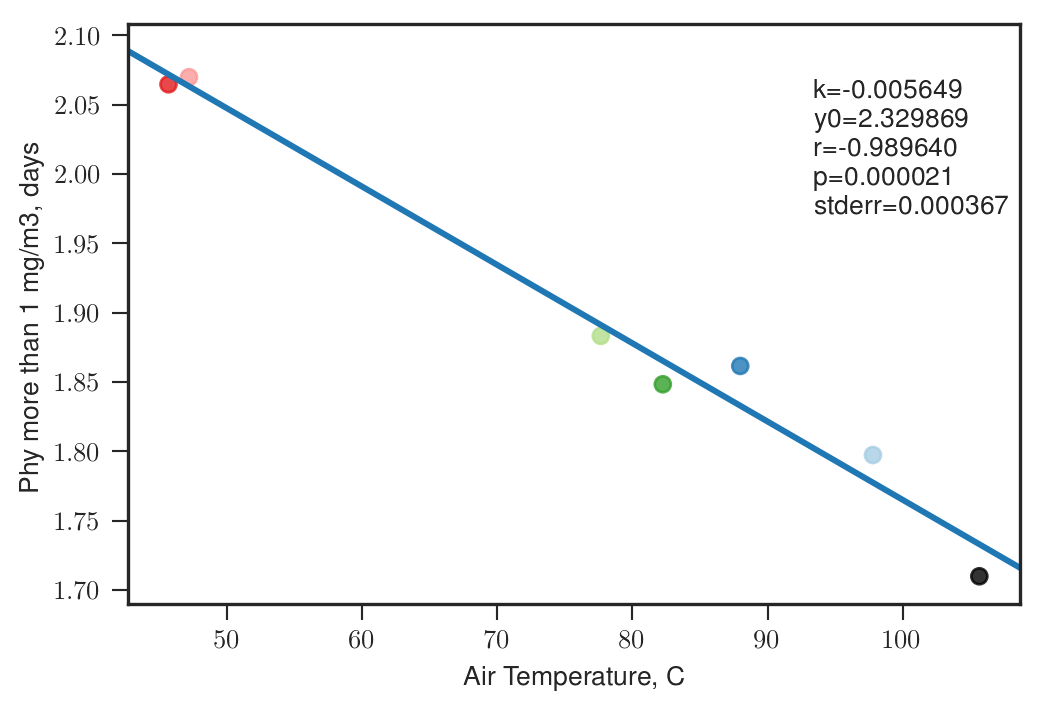

In [248]:
y, x = np.array( Kz_av ), np.array(ice_bool_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

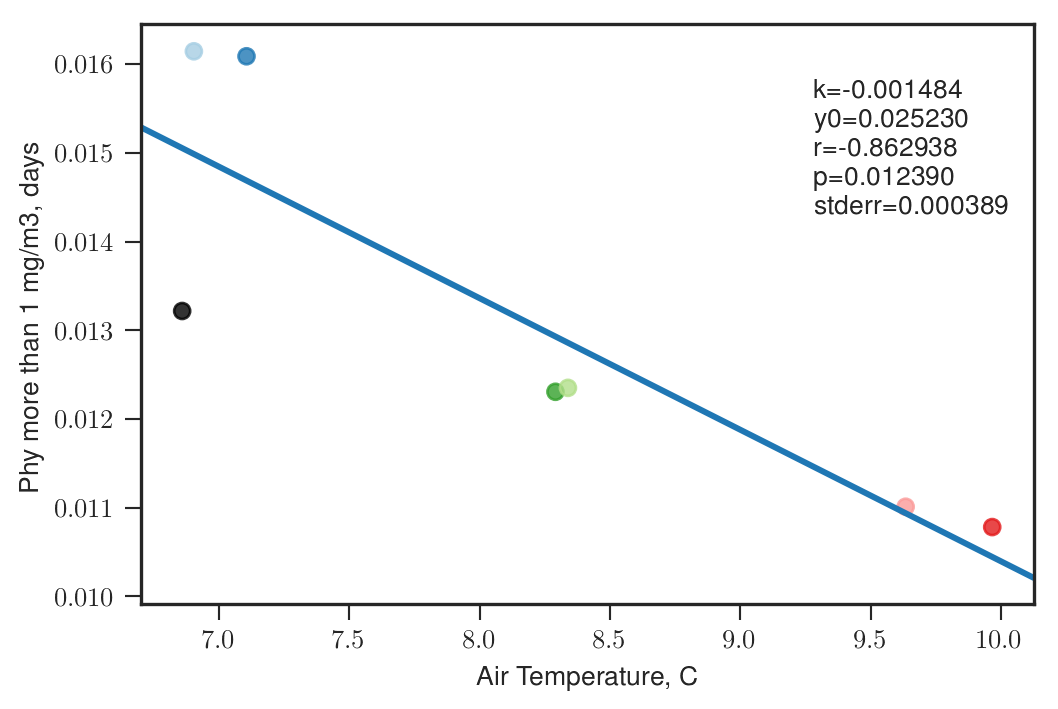

In [249]:
y, x = np.array(-Chl_fx[names_scen].mean()) / np.array(phy_int_yearly), np.array(av_T)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Air Temperature, C')

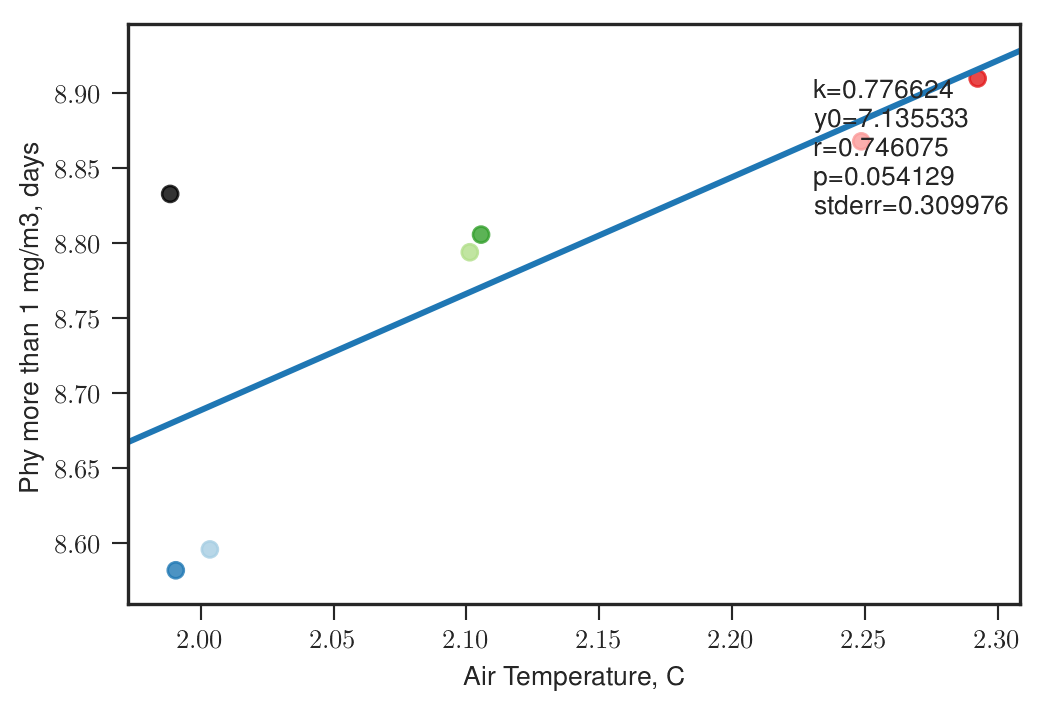

In [250]:
y, x = np.array(PO4_4m[names_scen].mean()), np.array(phy_int_yearly)
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Phy more than 1 mg/m3, days')
plt.xlabel('Air Temperature, C')
# plt.ylim(2,2.3)

Text(0.5,0,'Ice covered pertiods')

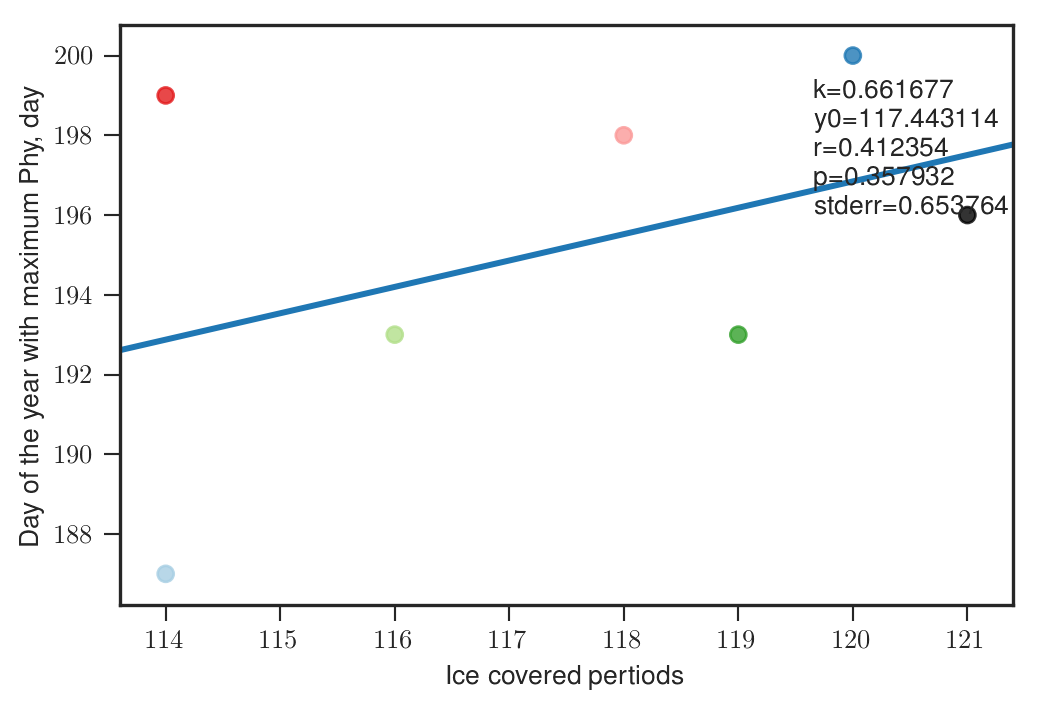

In [251]:
y, x = np.array(max_grow_DOY), np.array((Ice.groupby(['DOY']).mean()[names_scen] > 0.01).idxmin())
sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt})
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [252]:
pycno_depth[-365*last_years:][(pycno_depth.DOY>100) & (pycno_depth.DOY<270)].groupby(['DOY']).mean()[names_scen].mean()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


RCP8 IPSL 2015-2070       9.792898
RCP4 IPSL 2015-2070       9.981265
RCP8 GFDL 2015-2070      10.199009
RCP4 GFDL 2015-2070      10.408508
RCP8 NorESM 2015-2070    12.928916
RCP4 NorESM 2015-2070    13.162389
Historical 1995-2015     10.277388
dtype: float64

In [253]:
-Chl_fx[names_scen].mean()

RCP8 IPSL 2015-2070      0.024716
RCP4 IPSL 2015-2070      0.024758
RCP8 GFDL 2015-2070      0.025911
RCP4 GFDL 2015-2070      0.025951
RCP8 NorESM 2015-2070    0.032025
RCP4 NorESM 2015-2070    0.032343
Historical 1995-2015     0.026281
dtype: float64

In [254]:
PO4_4m[names_scen].mean()

RCP8 IPSL 2015-2070      8.909888
RCP4 IPSL 2015-2070      8.867997
RCP8 GFDL 2015-2070      8.805826
RCP4 GFDL 2015-2070      8.794074
RCP8 NorESM 2015-2070    8.582107
RCP4 NorESM 2015-2070    8.596025
Historical 1995-2015     8.832932
dtype: float64

In [255]:
p_int_each_year = []
o_int_each_year = []
oxy_int_each_year = []
phy_int_each_year = []
ice_bool_int_each_year = []
ice_int_each_year = []
av_T_each_year = []

for y in np.arange(2015, 2070):
    for scen in names_scen:
        p_int_each_year.append(trapz(P_fx[P_fx.Year==y][scen], dx=1./365))
        o_int_each_year.append(trapz(O2_fx[O2_fx.Year==y][scen], dx=1./365))
        phy_int_each_year.append(trapz(Phy[Phy.Year==y][scen], dx=1./365))
        ice_int_each_year.append(trapz(Ice[Ice.Year==y][scen], dx=1./365))
        ice_bool_int_each_year.append(trapz(Ice_bool[Ice.Year==y][scen], dx=1))
        av_T_each_year.append(Tair[Tair.Year==y][scen].mean())
        oxy_int_each_year.append(Oxy[Oxy.Year==y][scen].mean())

Text(0.5,0,'Ice covered pertiods')

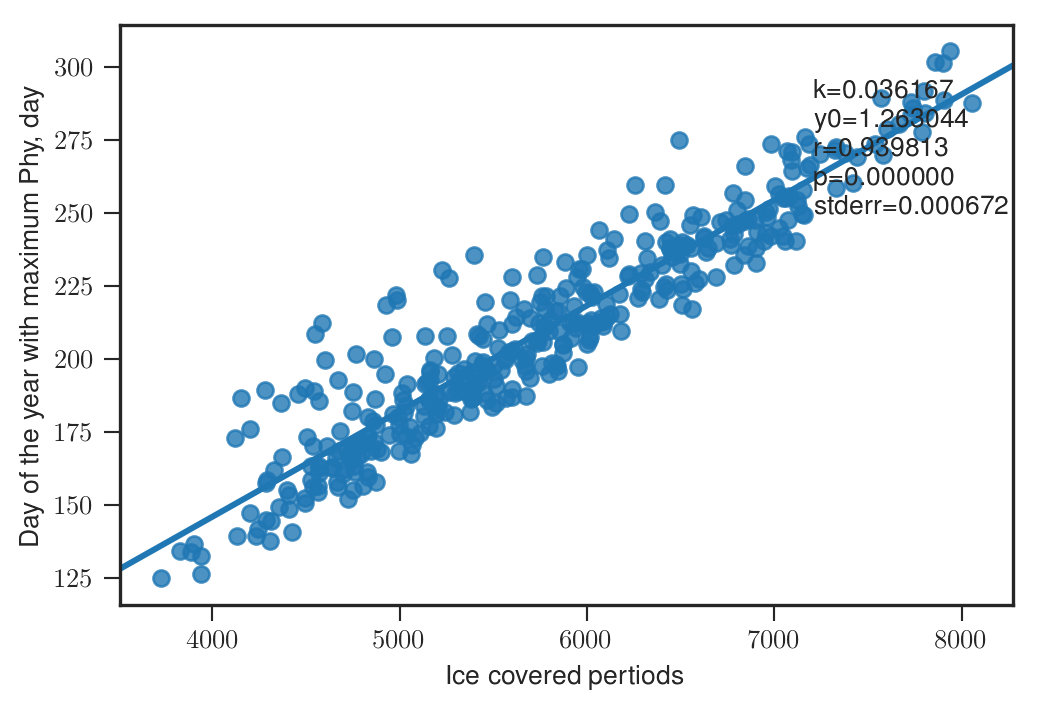

In [256]:
y, x = np.array(o_int_each_year), np.array(oxy_int_each_year)
sns.regplot(x, y, ci=None)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    plt.text(0.75, 0.9-i/20, s+'{:f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax.transAxes)
plt.ylabel('Day of the year with maximum Phy, day')
plt.xlabel('Ice covered pertiods')
# plt.ylim(2,2.3)

In [257]:
p_int_yearly = []
pui_int_yearly = [] #under ice cover
pni_int_yearly = [] #under ice cover
fe_fx_ui_int_yearly = [] #under ice cover
fe_fx_ni_int_yearly = [] #no ice cover
o_int_yearly = []
o_ui_int_yearly = []
o_ni_int_yearly = []
oxy_int_yearly = []
oxy_ui_int_yearly = []
oxy_ni_int_yearly = []
ice_int_yearly = []
ice_bool_int_yearly = []
phy_int_yearly = []
av_T = []
fe_int_yearly = []
Kz_av = []
days_of_bloom_1mg = []
phy_may_sept_mean = []
max_grow_DOY = []

for y in np.arange(2016, 2070):
    for scen in names_scen:
        ice_days = Ice_bool[Ice_bool.Year==y][scen].mean()*365
        ice_bool_int_yearly.append(ice_days)
        p_int_yearly.append(P_fx[P_fx.Year==y][scen].mean())
        pui_int_yearly.append(P_fx[P_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        pni_int_yearly.append(P_fx[P_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        fe_fx_ui_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        fe_fx_ni_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        fe_int_yearly.append(Fe2_fx[Fe2_fx.Year==y][scen].mean())
        o_int_yearly.append(O2_fx[O2_fx.Year==y][scen].mean())
        o_ui_int_yearly.append(O2_fx[O2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        o_ni_int_yearly.append(O2_fx[O2_fx.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        oxy_int_yearly.append(Oxy[Oxy.Year==y][scen].mean())
        oxy_ui_int_yearly.append(Oxy[Oxy.Year==y][Ice_bool[Ice_bool.Year==y][scen]==0][scen].mean())
        oxy_ni_int_yearly.append(Oxy[Oxy.Year==y][Ice_bool[Ice_bool.Year==y][scen]>0][scen].mean())
        ice_int_yearly.append(Ice[Ice.Year==y][scen].mean())
        av_T.append(Tair[Tair.Year==y][scen].mean())
        phy_int_yearly.append(Phy[Phy.Year==y][scen].mean())
        days_of_bloom_1mg.append((Phy[Phy.Year==y].groupby(['DOY']).mean()[scen] < phy_mass)[::-1].idxmin() - (Phy[Phy.Year==y].groupby(['DOY']).mean()[scen] < phy_mass).idxmin())
        phy_may_sept_mean.append( Phy[Phy.Year==y][(Phy[Phy.Year==y].DOY>120) & (Phy[Phy.Year==y].DOY<275)].groupby(['DOY']).mean()[scen].mean())
        max_grow_DOY.append( Phy[Phy.Year==y].groupby(['DOY']).mean().diff()[scen].idxmax())
        Kz_av.append(Kz_mean[Kz_mean.Year==y][scen].mean()) 

In [258]:
lrs = pd.DataFrame({'ice days':ice_bool_int_yearly, 
#                     'ice thickness':ice_int_yearly, 
                    'phy':phy_int_yearly, 
                    'P flux':p_int_yearly, 
                    'T air':av_T, 
                    'o2 flux':o_int_yearly, 
                    'o2 flux under ice':o_ui_int_yearly, 
                    'o2 flux no ice':o_ni_int_yearly,  
                    'o2 C at SWI':oxy_int_yearly, 
                    'o2 C at SWI under ice':oxy_ui_int_yearly, 
                    'o2 C at SWI no ice':oxy_ni_int_yearly,  
                    'P flux under ice':pui_int_yearly,
                    'P flux no ice':pni_int_yearly,
                    'Fe2 flux under ice':fe_fx_ui_int_yearly,
                    'Fe2 flux no ice':fe_fx_ni_int_yearly,
                    'Kz average':Kz_av,
#                     'max ice thickness':max_ice_h,
                    'max grow DOY':max_grow_DOY,
#                     'ice break up day':ice_break_up,
                    'Fe2 flux':fe_int_yearly})

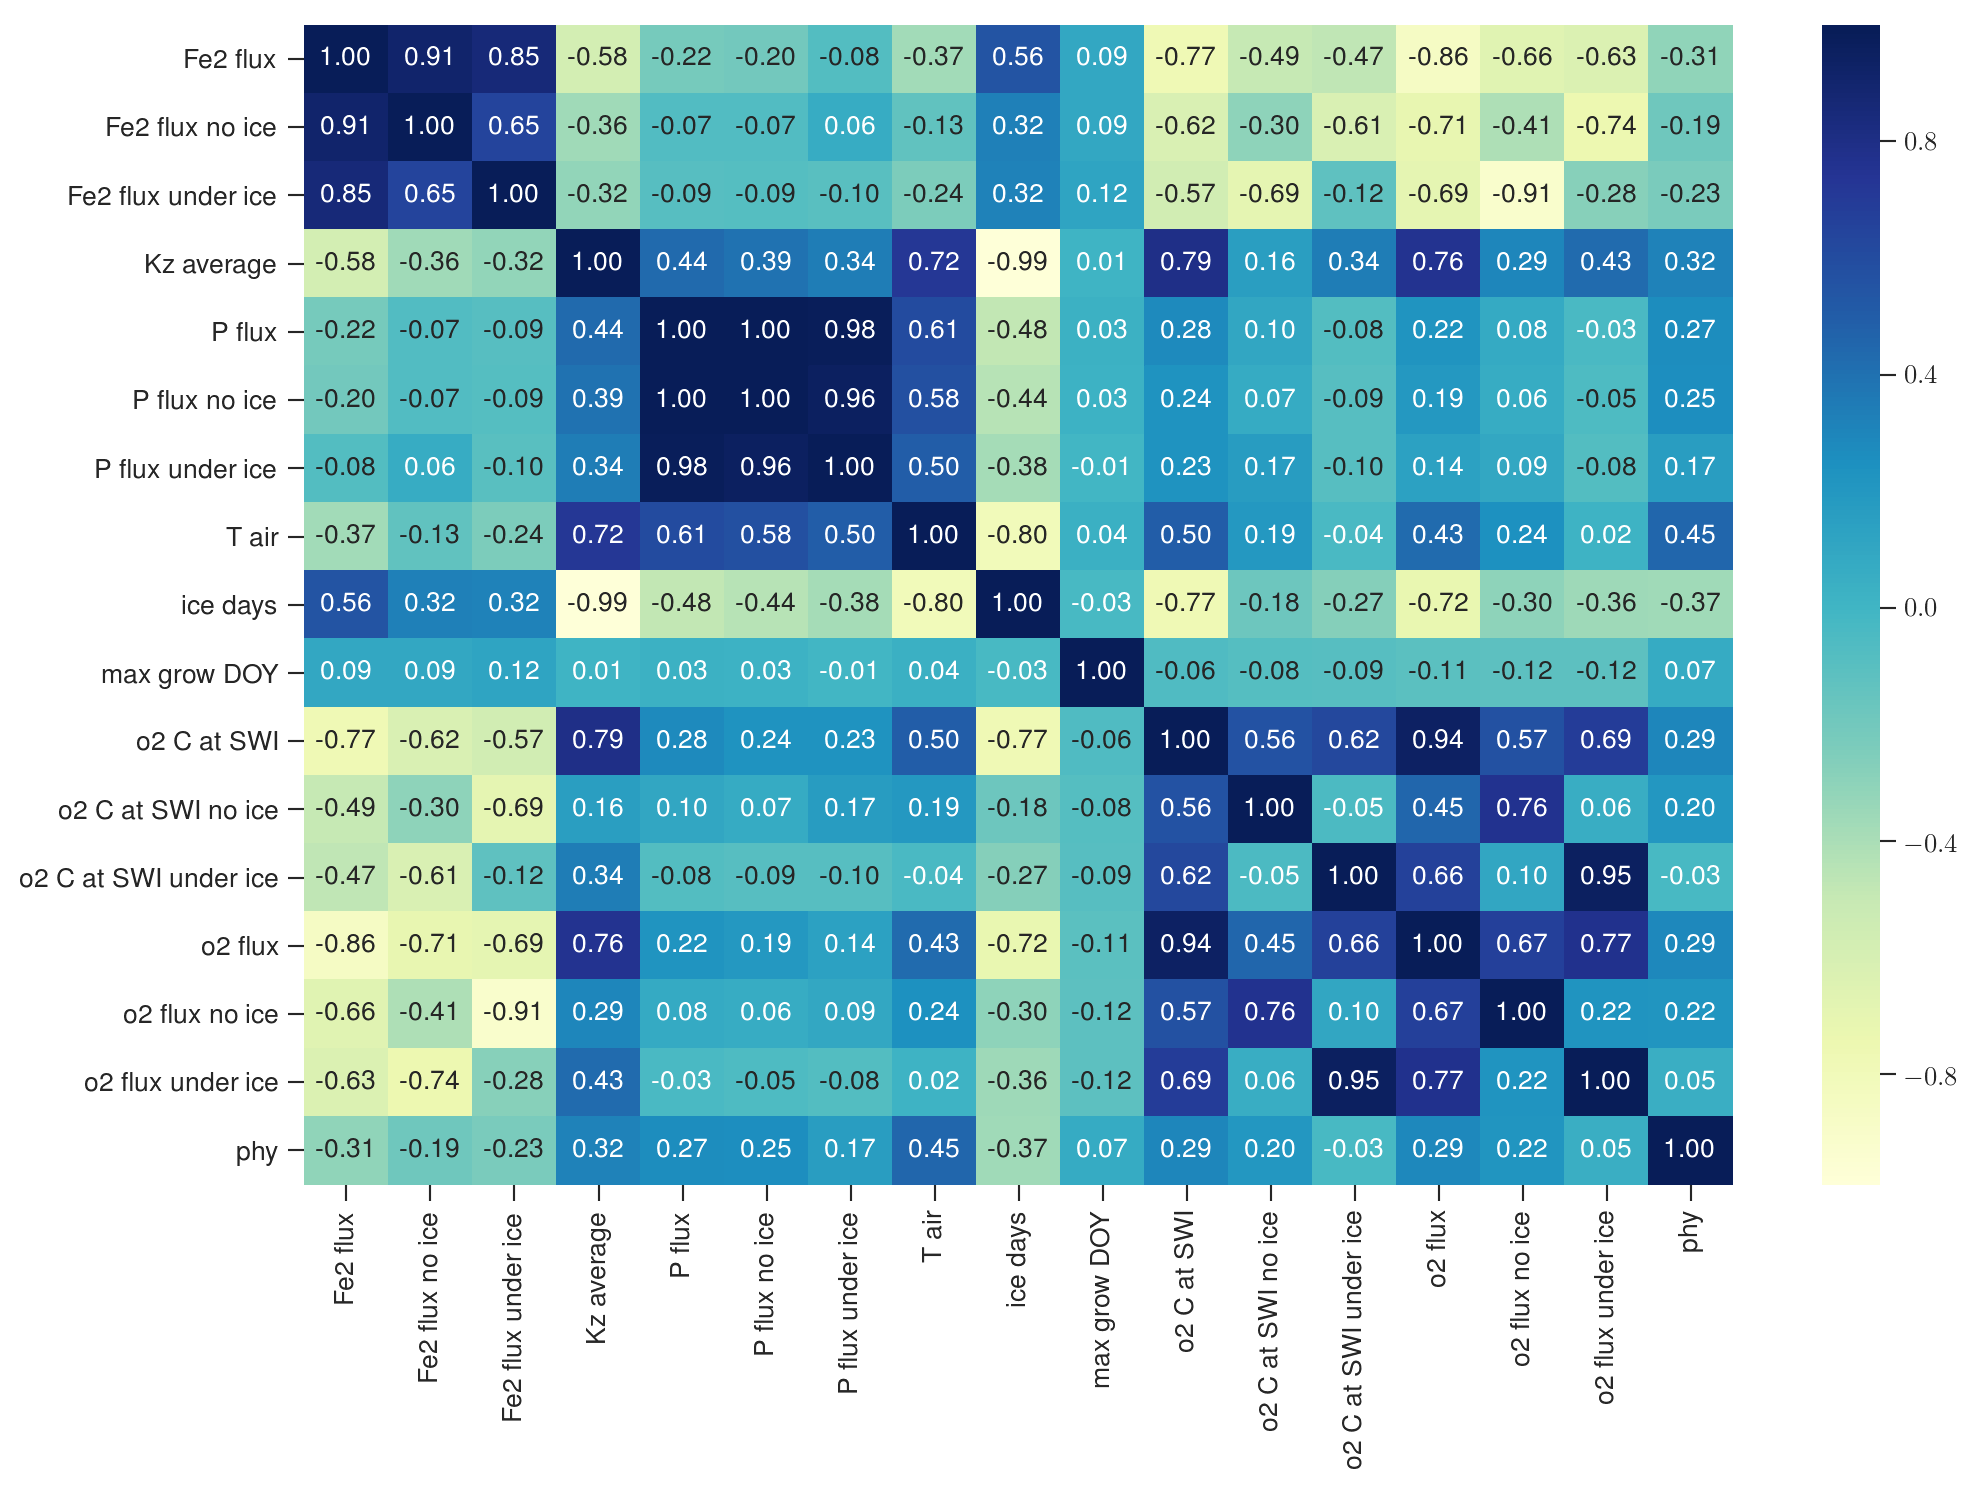

In [259]:
plt.figure(figsize=(12,8))
sns.heatmap(lrs.corr(), xticklabels=lrs.corr().columns, yticklabels=lrs.corr().columns, center=0,  annot=True, fmt='.2f', cmap="YlGnBu")

(1.25, 2.5)

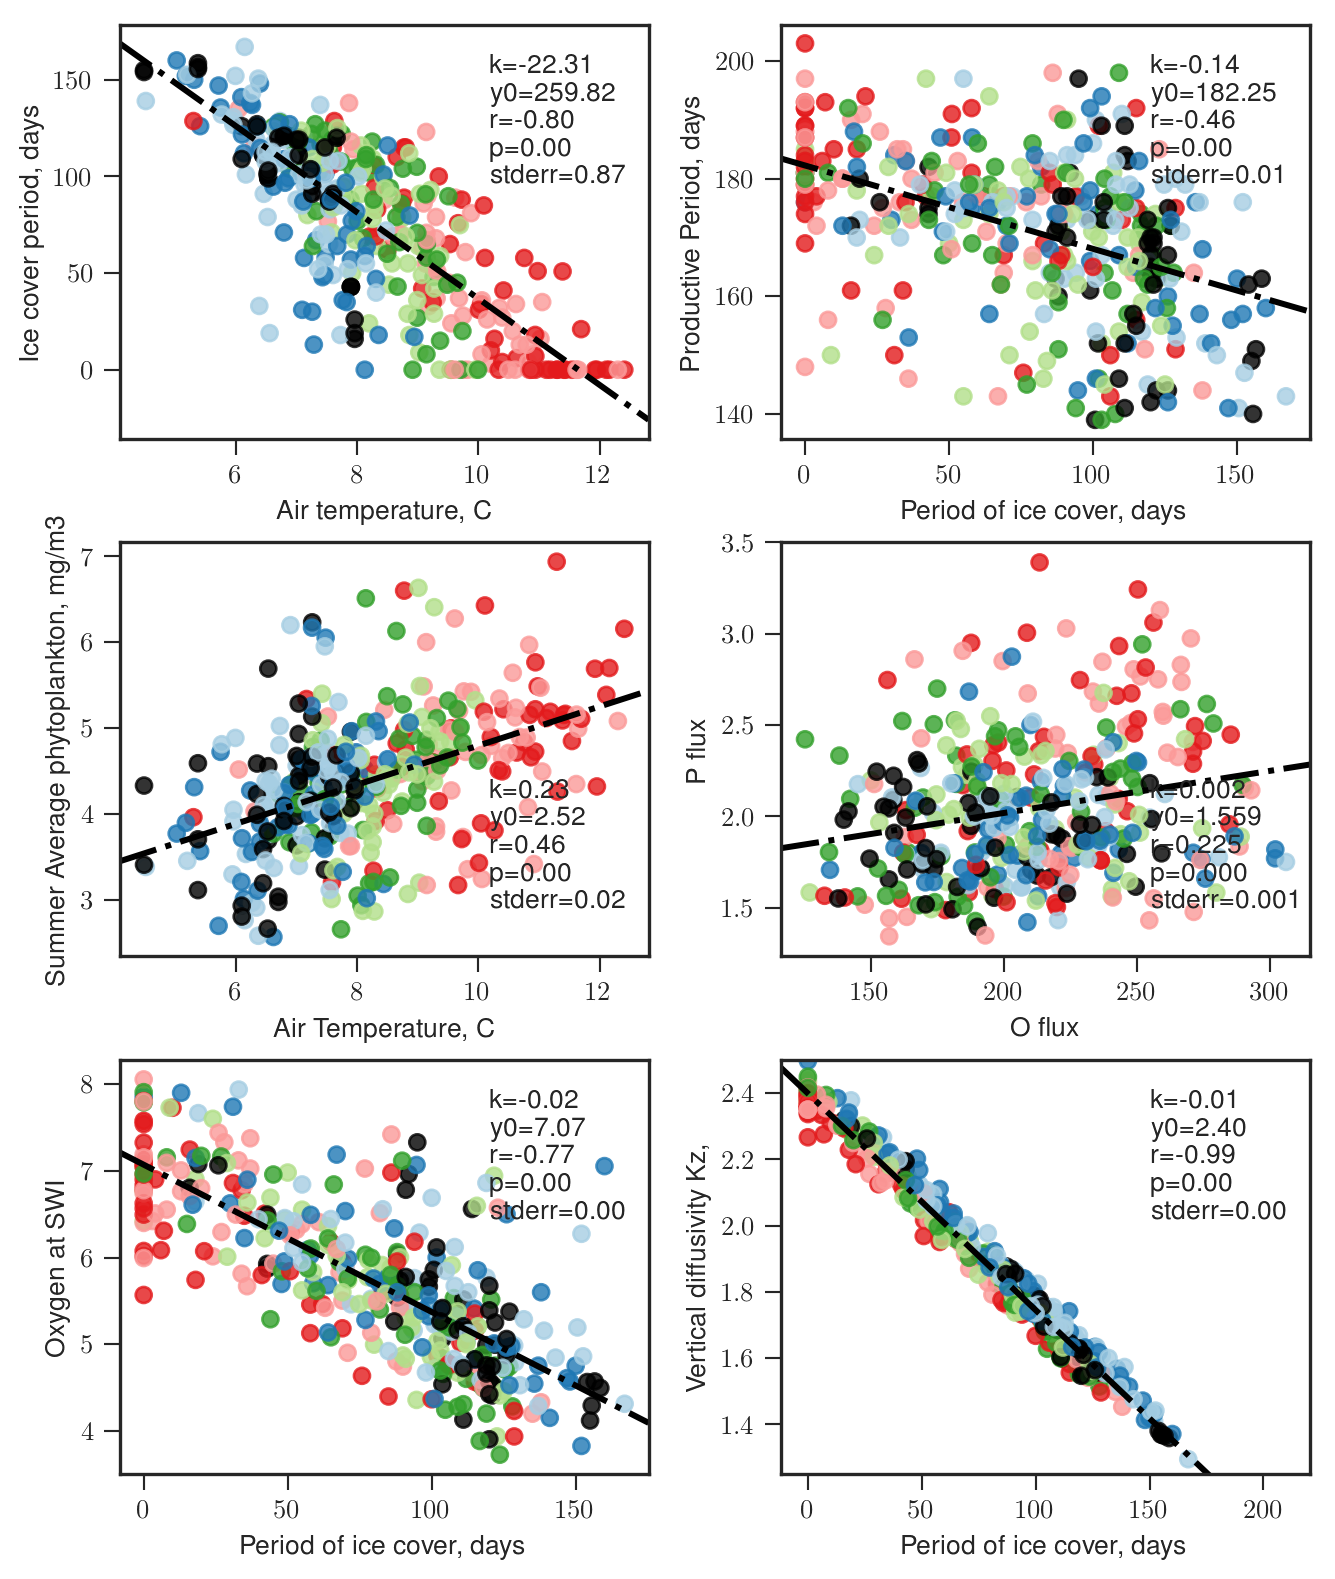

In [260]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(8,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.25, hspace=0.25)

x, y=np.array(av_T), np.array(ice_bool_int_yearly)
ax1=sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax1)
lr = linregress(np.array(av_T), np.array(ice_bool_int_yearly))
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax1.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax1.transAxes)
ax1.set_ylabel('Ice cover period, days')
ax1.set_xlabel('Air temperature, C')


y, x = np.array(days_of_bloom_1mg), np.array(ice_bool_int_yearly)
ax2 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax2)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax2.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax2.transAxes)
ax2.set_ylabel(r'Productive Period, days')
ax2.set_xlabel('Period of ice cover, days')



y, x = np.array(phy_may_sept_mean), np.array(av_T)
ax3 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax3)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax3.text(0.7, 0.4-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax3.transAxes)
ax3.set_ylabel('Summer Average phytoplankton, mg/m3')
ax3.set_xlabel('Air Temperature, C')



y, x = np.array(p_int_yearly), np.array(o_int_yearly)
ax4 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax4)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax4.text(0.7, 0.4-i/15, s+'{:.3f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax4.transAxes)
ax4.set_xlabel('O flux')
ax4.set_ylabel('P flux')


y, x = np.array(oxy_int_yearly)*1e-3, np.array(ice_bool_int_yearly)
ax5 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax5)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax5.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax5.transAxes)
# ax6.legend_.remove()
ax5.set_ylabel('Oxygen at SWI')
ax5.set_xlabel('Period of ice cover, days')


y, x = np.array(Kz_av), np.array(ice_bool_int_yearly)

ax6 = sns.regplot(x, y, ci=None, scatter_kws={'color':clr_pltt}, line_kws={'color':'k', 'linestyle':'-.'}, ax=ax6)
lr = linregress(x,y)
for i, (s, k) in enumerate(zip(['k=', 'y0=', 'r=','p=', 'stderr='], lr)):
    ax6.text(0.7, 0.9-i/15, s+'{:.2f}'.format(k), horizontalalignment='left', verticalalignment='center',transform=ax6.transAxes)
# ax5.legend_.remove()
ax6.set_ylabel('Vertical diffusivity Kz, ')
ax6.set_xlabel('Period of ice cover, days')
# ax6.relim()      # make sure all the data fits
# ax6.autoscale()
# ax6.set_xlim(41,108)
ax6.set_ylim(1.25,2.5)






# ax1.grid(linestyle='-', linewidth=0.2)
# ax2.grid(linestyle='-', linewidth=0.2)
# ax3.grid(linestyle='-', linewidth=0.2)

# plt.xlim(1,53)
# plt.title('2040-2050 Mean Phy')

In [261]:
RCP8_IPSL_plotter.close()
RCP4_IPSL_plotter.close()
RCP8_GFDL_plotter.close()
RCP4_GFDL_plotter.close()
RCP8_NorESM_plotter.close()
RCP4_NorESM_plotter.close()
hist_20y_plotter.close()
str(datetime.now())

'2018-02-21 19:10:50.134816'